**7330 Final Project**

**Group Name**:Espresso

**Member** :
JIANG Hanbing 24456276 (Group Leader)

BING Rui 24420387

Wang Junyue 24462578

Huo Xinran 24433373


In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [ ]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Mounted at /content/drive


In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=6ff24bf68c7e5862021c1c83db9c853a33f3d0d4368a3367fa49be45dc4d5ba2
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


##WANG Junyue CODE Part


In [ ]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/lydiainthehouse/7330group/main/'
doc = 'Number and gender of wage groups.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
Number_and_gender_of_wage_groups = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(Number_and_gender_of_wage_groups)

/content/drive/MyDrive/Colab Notebooks/data/Number and gender of wage groups (1).csv


In [ ]:
# Read the latest file uploaded and check the data content
data_2023_final = pd.read_csv(Number_and_gender_of_wage_groups, header=None, encoding='utf-8')

# Print the first few lines of data to check the contents
data_2023_final.head()

# Extract the data for lines 7 through 29, which contain relevant data for 2023
data_2023_subset = data_2023_final.iloc[6:29].reset_index(drop=True)

# Rename column
data_2023_subset.columns = ["Year", "Quarter", "Monthly employment earnings",
                                 "Male No. ('000)", "Male Percentage share (%)",
                                 "Female No. ('000)", "Female Percentage share (%)",
                                 "Both sexes No. ('000)", "Both sexes Percentage share (%)"]

# Keep only the columns related to the number of employees and exclude the percentage column
data_2023_filtered_final = data_2023_subset[["Monthly employment earnings", "Male No. ('000)", "Female No. ('000)"]]
# Print clean 2023 data
data_2023_filtered_final.head()

Monthly employment earnings Male No. ('000) Female No. ('000)
0                     < 3,000            29.0              41.5
1               3,000 - 3,999            11.0              18.6
2               4,000 - 4,999            11.3              20.8
3               5,000 - 5,999            15.1              24.2
4               6,000 - 6,999            16.0              24.0

<ipython-input-8-f6ed1ebc675d>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_2023_grouped_final = data_2023_melted_sorted_final.groupby(["Monthly employment earnings", "Gender"], as_index=False).mean()


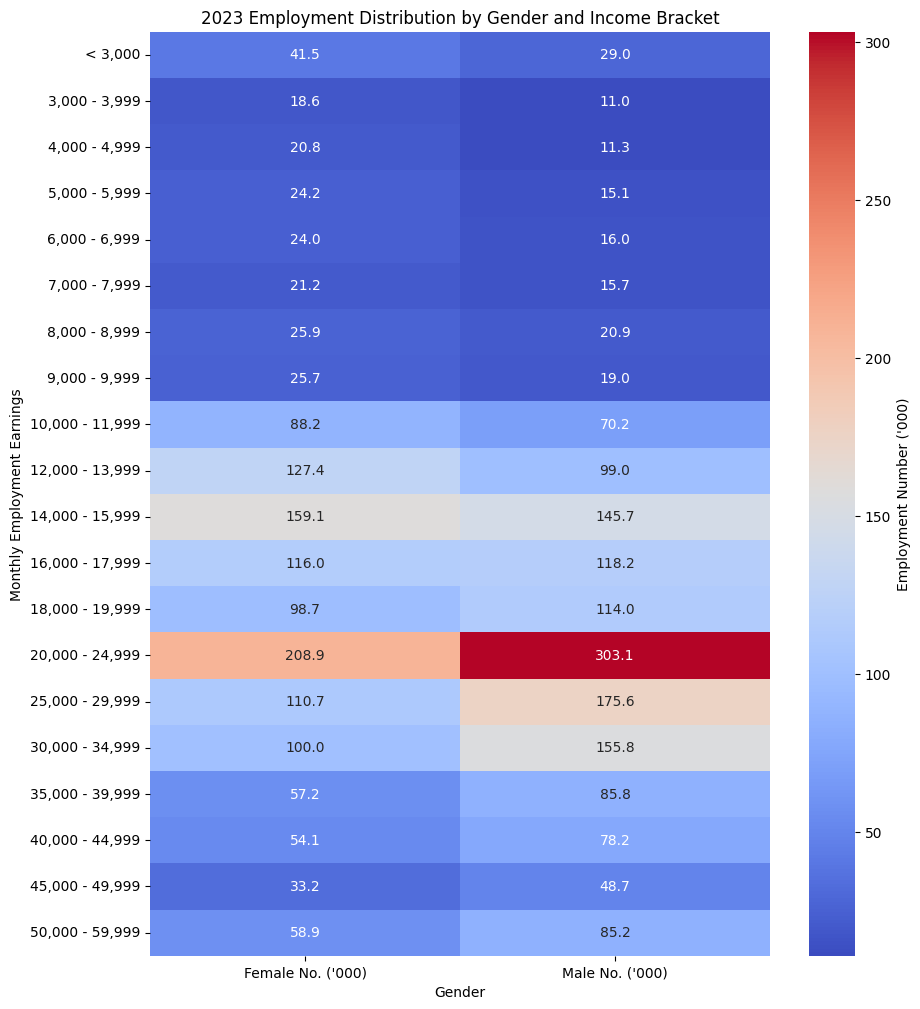

In [ ]:
# Convert data to a long format for easy drawing
data_2023_melted_final = data_2023_filtered_final.melt(id_vars=["Monthly employment earnings"],
                            value_vars=["Male No. ('000)", "Female No. ('000)"],
                            var_name="Gender", value_name="Employment Number")
# Clean up the Gender column and remove redundant text
data_2023_melted_final["Gender"] = data_2023_melted_final["Gender"].str.replace(" No. \(\'000\)", "")

# Converts the Employment Number column to numeric type
data_2023_melted_final["Employment Number"] = pd.to_numeric(data_2023_melted_final["Employment Number"], errors='coerce')

# Define the correct order of income ranges
income_order_final = [
    "< 3,000", "3,000 - 3,999", "4,000 - 4,999", "5,000 - 5,999",
    "6,000 - 6,999", "7,000 - 7,999", "8,000 - 8,999", "9,000 - 9,999",
    "10,000 - 11,999", "12,000 - 13,999", "14,000 - 15,999", "16,000 - 17,999",
    "18,000 - 19,999", "20,000 - 24,999", "25,000 - 29,999", "30,000 - 34,999",
    "35,000 - 39,999", "40,000 - 44,999", "45,000 - 49,999", "50,000 - 59,999"
]

# Convert the income range to a categorical data type and set the order
data_2023_melted_final["Monthly employment earnings"] = pd.Categorical(data_2023_melted_final["Monthly employment earnings"], categories=income_order_final, ordered=True)

# Sort by income range
data_2023_melted_sorted_final = data_2023_melted_final.sort_values("Monthly employment earnings")

# Make sure there are no duplicates by grouping data and averaging it
data_2023_grouped_final = data_2023_melted_sorted_final.groupby(["Monthly employment earnings", "Gender"], as_index=False).mean()

# Try creating a pivot table again
pivot_table_final = data_2023_grouped_final.pivot(index="Monthly employment earnings",columns="Gender",values="Employment Number")
# Draw a heat map
plt.figure(figsize=(10, 12))
sns.heatmap(pivot_table_final, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={"label": "Employment Number ('000)"})

plt.title("2023 Employment Distribution by Gender and Income Bracket")
plt.ylabel("Monthly Employment Earnings")
plt.xlabel("Gender")
plt.show()


###Findings:
The heatmap depicts the employment distribution based on gender and income brackets for the year 2023. Males dominate the higher income brackets,females have a balanced representation across lower income brackets. The 20,000 - 24,999 income bracket stands out with the highest employment figures, particularly for males at 303,000. This indicates a strong concentration of male employment in this bracket. The 20,000 - 24,999 bracket serves as a critical threshold for male employment, while females struggle to transition into higher earnings. A marked drop in employment is observed as income brackets increase, particularly for females, indicating a potential gap in career advancement opportunities.




###Radar chart of the number of unemployed and the unemployment rate by age and sex

In [ ]:
# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/lydiainthehouse/7330group/main/'
doc = 'Gender and age of the number of unemployed.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
Gender_and_age_of_the_number_of_unemployed = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(Gender_and_age_of_the_number_of_unemployed)

/content/drive/MyDrive/Colab Notebooks/data/Gender and age of the number of unemployed (1).csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Read the unemployment gender CSV file and check the data content
file_path_unemployment = 'Gender and age of the number of unemployed.csv'
unemployment_data = pd.read_csv(Gender_and_age_of_the_number_of_unemployed, header=None)

#Print the first few lines of data to check its structure
unemployment_data.head()
# Re-read the user uploaded unemployment gender CSV file and exclude the data in line 17
unemployment_data_updated_v2 = pd.read_csv(Gender_and_age_of_the_number_of_unemployed, header=None)

# Extract data for 2023, excluding row 17 (index 16)
unemployment_data_2023_updated_v2 = unemployment_data_updated_v2.iloc[7:19, :].drop(16)

# Set the column name manually
columns_unemployment_updated_v2 = ['Year', 'Empty1', 'Age Group',
                                         'Male No', 'Male %', 'Female No', 'Female %',
                                         'Both No', 'Both %']

unemployment_data_2023_updated_v2.columns = columns_unemployment_updated_v2

# Clean up the data and remove unnecessary columns and Spaces
unemployment_data_2023_updated_v2 = unemployment_data_2023_updated_v2[['Year', 'Age Group', 'Male No', 'Male %', 'Female No', 'Female %']]
unemployment_data_2023_updated_v2['Age Group'] = unemployment_data_2023_updated_v2['Age Group'].str.strip()

# Print the extracted data to confirm correctness
unemployment_data_2023_updated_v2.head()

Year Age Group Male No Male % Female No Female %
7   2023   15 - 19     1.3   11.5       0.8      7.6
8   2023   20 - 24     7.6    9.3       7.0      8.4
9   2023   25 - 29     9.6    5.4       7.1      3.7
10  2023   30 - 34     6.6    3.1       4.7      2.0
11  2023   35 - 39     5.7    2.6       3.8      1.5

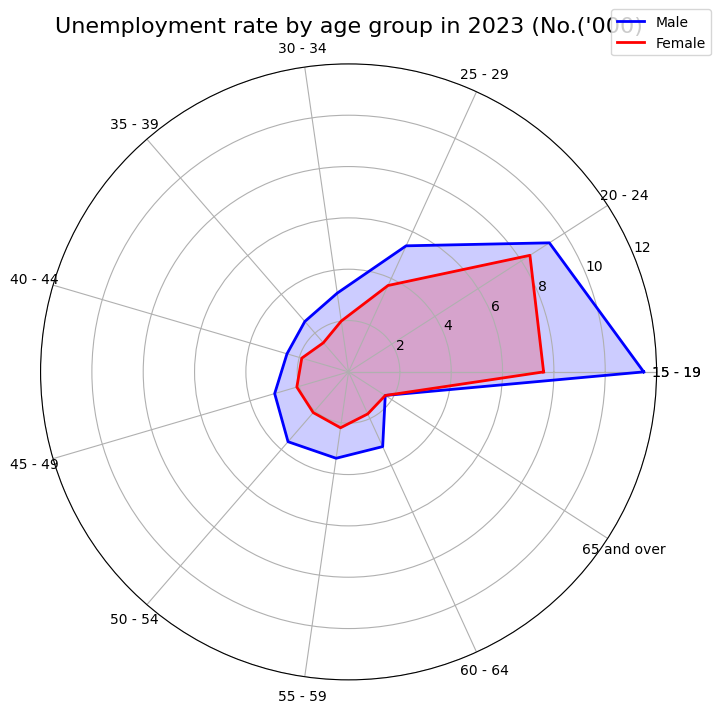

In [ ]:
# Converts data to a numeric type
unemployment_data_2023_updated_v2['Male %'] = pd.to_numeric(unemployment_data_2023_updated_v2['Male %'], errors='coerce')
unemployment_data_2023_updated_v2['Female %'] = pd.to_numeric(unemployment_data_2023_updated_v2['Female %'], errors='coerce')

# Set category of radar map (age group)
categories_updated_v2 = unemployment_data_2023_updated_v2['Age Group'].tolist()
categories_updated_v2 = [*categories_updated_v2, categories_updated_v2[0]]  # Closed radar chart

# Get the unemployment rate for men and women and close it
male_values_updated_v2 = unemployment_data_2023_updated_v2['Male %'].tolist()
male_values_updated_v2 = [*male_values_updated_v2, male_values_updated_v2[0]]

female_values_updated_v2 = unemployment_data_2023_updated_v2['Female %'].tolist()
female_values_updated_v2 = [*female_values_updated_v2, female_values_updated_v2[0]]

# Map the radar
label_loc_updated_v2 = np.linspace(start=0, stop=2 * np.pi, num=len(male_values_updated_v2))

plt.figure(figsize=(10, 8))
plt.subplot(polar=True)

plt.plot(label_loc_updated_v2, male_values_updated_v2, label='Male', color='blue', linewidth=2)
plt.plot(label_loc_updated_v2, female_values_updated_v2, label='Female', color='red', linewidth=2)
plt.fill(label_loc_updated_v2, male_values_updated_v2, color='blue', alpha=0.2)
plt.fill(label_loc_updated_v2, female_values_updated_v2, color='red', alpha=0.2)

# Add category tags
plt.xticks(label_loc_updated_v2, categories_updated_v2)

# Add a title and legend to indicate the number of units
plt.title(("Unemployment rate by age group in 2023 (No.('000)"), size=16, color='black')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show charts
plt.show()

###Findings:
The radar chart presents the unemployment rates for males (blue) and females (red) across different age groups in 2023. The unemployment rate is highest among the younger age groups for both genders, indicating significant challenges for younger individuals entering the job market. There is a notable decline in unemployment rates as age increases. The 55 - 59 and 65 and over age groups show lower unemployment rates, likely reflecting the stability and experience of older workers.

###The two-axis stacked bar chart combining employment and unemployment

In [ ]:
# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/lydiainthehouse/7330group/main/'
doc = 'Age and sex of the number of people employed.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
Age_and_sex_of_the_number_of_people_employed = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(Age_and_sex_of_the_number_of_people_employed)

/content/drive/MyDrive/Colab Notebooks/data/Age and sex of the number of people employed (1).csv


In [ ]:
# Let's load the provided CSV files and inspect their contents to understand the structure.
import pandas as pd

# Load the two CSV files
employment_file_path = 'Age_and_sex_of_the_number_of_people_employed.csv'
unemployment_file_path = 'Gender_and_age_of_the_number_of_unemployed.csv'

# Read the CSV files without headers as instructed
employment_data = pd.read_csv(Age_and_sex_of_the_number_of_people_employed, header=None)

unemployment_data = pd.read_csv(Gender_and_age_of_the_number_of_unemployed, header=None)

# Display the first few rows of both datasets to understand their structure
employment_data.head(), unemployment_data.head()
# It seems that the first few rows contain metadata or are empty. Let's skip the initial rows and focus on the relevant data.
# Based on the previous description, we will extract the required rows from both datasets.

# For the employment data, we need rows 8 to 19, excluding row 17
employment_data_filtered = employment_data.iloc[list(range(7, 16)) + list(range(18, 19))].reset_index(drop=True)

# For the unemployment data, we need rows 8 to 19, excluding row 17
unemployment_data_filtered = unemployment_data.iloc[list(range(7, 16)) + list(range(18, 19))].reset_index(drop=True)

# Display the extracted data to verify
employment_data_filtered.head(), unemployment_data_filtered.head()

(      0    1             2      3     4      5     6      7     8
 0  2023  NaN       15 - 19    9.8   0.5    9.6   0.6   19.5   0.6
 1  2023  NaN       20 - 24   73.9   4.0   72.1   4.6  145.9   4.3
 2  2023  NaN       25 - 29  169.5   9.3  162.4  10.4  331.9   9.8
 3  2023  NaN       30 - 34  203.2  11.1  175.7  11.3  378.9  11.2
 4  2023  NaN       35 - 39  210.6  11.5  178.5  11.5  389.2  11.5,
       0    1             2    3     4    5    6     7    8
 0  2023  NaN       15 - 19  1.3  11.5  0.8  7.6   2.1  9.6
 1  2023  NaN       20 - 24  7.6   9.3  7.0  8.4  14.5  8.8
 2  2023  NaN       25 - 29  9.6   5.4  7.1  3.7  16.7  4.5
 3  2023  NaN       30 - 34  6.6   3.1  4.7  2.0  11.3  2.6
 4  2023  NaN       35 - 39  5.7   2.6  3.8  1.5   9.5  2.0)

In [ ]:
# Now that we have the correct data, let's clean and prepare it for plotting.
# We will rename the columns for better readability and filter only the necessary columns.

# Renaming columns for employment data
employment_data_filtered.columns = ['Year', 'Quarter', 'Age_Group', 'Male_Employed', 'Male_Percentage', 'Female_Employed', 'Female_Percentage', 'Both_Employed', 'Both_Percentage']

# Renaming columns for unemployment data
unemployment_data_filtered.columns = ['Year', 'Quarter', 'Age_Group', 'Male_U_Employed', 'Male_U_Rate', 'Female_U_Employed', 'Female_U_Rate', 'Both_U_Employed', 'Both_U_Rate']

# Extracting only the 2023 data for both datasets (though it seems already filtered)
employment_data_2023 = employment_data_filtered[employment_data_filtered['Year'] == '2023']
unemployment_data_2023 = unemployment_data_filtered[unemployment_data_filtered['Year'] == '2023']

# Convert relevant columns to numeric
employment_data_2023[['Male_Employed', 'Female_Employed']] = employment_data_2023[['Male_Employed', 'Female_Employed']].apply(pd.to_numeric)
unemployment_data_2023[['Male_U_Employed', 'Female_U_Employed']] = unemployment_data_2023[['Male_U_Employed', 'Female_U_Employed']].apply(pd.to_numeric)

# Display the cleaned data to verify
employment_data_2023.head(), unemployment_data_2023.head()


(   Year Quarter     Age_Group  Male_Employed Male_Percentage  Female_Employed  \
 0  2023     NaN       15 - 19            9.8             0.5              9.6   
 1  2023     NaN       20 - 24           73.9             4.0             72.1   
 2  2023     NaN       25 - 29          169.5             9.3            162.4   
 3  2023     NaN       30 - 34          203.2            11.1            175.7   
 4  2023     NaN       35 - 39          210.6            11.5            178.5   
 
   Female_Percentage Both_Employed Both_Percentage  
 0               0.6          19.5             0.6  
 1               4.6         145.9             4.3  
 2              10.4         331.9             9.8  
 3              11.3         378.9            11.2  
 4              11.5         389.2            11.5  ,
    Year Quarter     Age_Group  Male_U_Employed Male_U_Rate  Female_U_Employed  \
 0  2023     NaN       15 - 19              1.3        11.5                0.8   
 1  2023     NaN       

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming employment_data_2023 and unemployment_data_2023 are already defined DataFrames

# Convert columns to numeric
employment_data_2023['Male_Employed'] = pd.to_numeric(employment_data_2023['Male_Employed'], errors='coerce')
employment_data_2023['Female_Employed'] = pd.to_numeric(employment_data_2023['Female_Employed'], errors='coerce')
unemployment_data_2023['Male_U_Rate'] = pd.to_numeric(unemployment_data_2023['Male_U_Rate'], errors='coerce')
unemployment_data_2023['Female_U_Rate'] = pd.to_numeric(unemployment_data_2023['Female_U_Rate'], errors='coerce')

# Fill NaN values if necessary
employment_data_2023.fillna(0, inplace=True)
unemployment_data_2023.fillna(0, inplace=True)

# Adjusting the plot to display the actual number of unemployed persons instead of the unemployment rate.

#we should inspect the data types to ensure proper conversion.

employment_data_2023.dtypes, unemployment_data_2023.dtypes

# It appears that some columns intended for numeric operations are still of type 'object'.
# Let's convert these columns to numeric types where applicable.

# Convert relevant columns to numeric for both datasets
columns_to_convert_employment = ['Male_Employed', 'Female_Employed']
columns_to_convert_unemployment = ['Male_U_Employed', 'Female_U_Employed', 'Male_U_Rate', 'Female_U_Rate']

employment_data_2023[columns_to_convert_employment] = employment_data_2023[columns_to_convert_employment].apply(pd.to_numeric, errors='coerce')
unemployment_data_2023[columns_to_convert_unemployment] = unemployment_data_2023[columns_to_convert_unemployment].apply(pd.to_numeric, errors='coerce')

# Verify the data types after conversion
employment_data_2023.dtypes, unemployment_data_2023.dtypes


<ipython-input-16-c333858afded>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  employment_data_2023.fillna(0, inplace=True)
<ipython-input-16-c333858afded>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  unemployment_data_2023.fillna(0, inplace=True)


(Year                  object
 Quarter                int64
 Age_Group             object
 Male_Employed        float64
 Male_Percentage       object
 Female_Employed      float64
 Female_Percentage     object
 Both_Employed         object
 Both_Percentage       object
 dtype: object,
 Year                  object
 Quarter                int64
 Age_Group             object
 Male_U_Employed      float64
 Male_U_Rate          float64
 Female_U_Employed    float64
 Female_U_Rate        float64
 Both_U_Employed       object
 Both_U_Rate           object
 dtype: object)

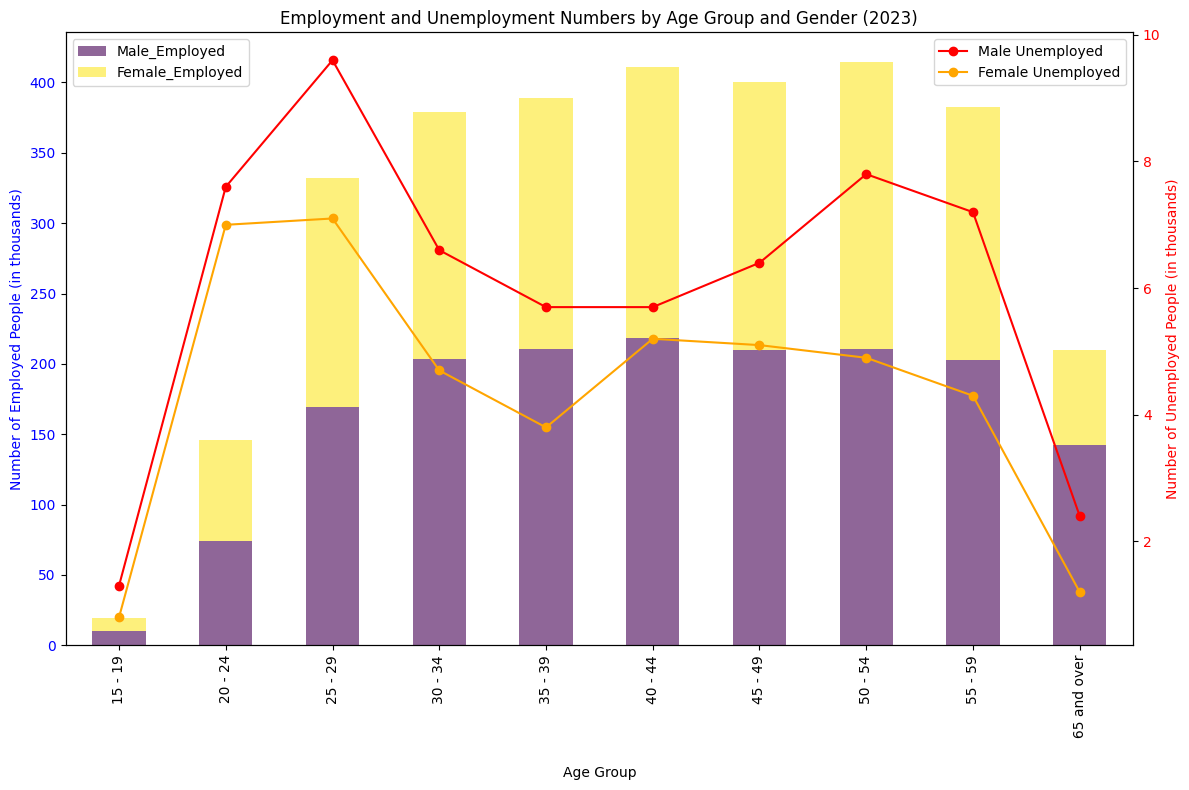

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting the employment data as a stacked bar chart
employment_data_2023.plot(kind='bar', x='Age_Group', y=['Male_Employed', 'Female_Employed'], stacked=True, ax=ax1, alpha=0.6, colormap='viridis')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number of Employed People (in thousands)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Employment and Unemployment Numbers by Age Group and Gender (2023)')

# Creating a second y-axis for unemployment numbers
ax2 = ax1.twinx()
unemployment_data_2023.plot(kind='line', x='Age_Group', y=['Male_U_Employed', 'Female_U_Employed'], ax=ax2, color=['red', 'orange'], marker='o', label=['Male Unemployed', 'Female Unemployed'])
ax2.set_ylabel('Number of Unemployed People (in thousands)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Findings:
The Two-axis stacked bar chart provides a comparative analysis of employment and unemployment figures by age group, segmented by gender for the year 2023.Males are generally more employed than females in all age groups,especially at 30-34 and 40-44. The chart reveals that the number of unemployed females is generally higher than that of males, especially in the younger age group 20 - 24 and 25 - 29 brackets, indicating that females face more challenges in the job market, highlighting potential issues such as lack of experience or access to job opportunities.

##BING Rui CODE Part

In [ ]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/lydiainthehouse/7330group/main/'
doc = 'Table 2_Eng.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
Number_of_persons  = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(Number_of_persons)

/content/drive/MyDrive/Colab Notebooks/data/Table 2_Eng.csv


In [ ]:
proverty_Nperson = pd.read_csv(Number_of_persons)

In [ ]:
print(type(proverty_Nperson))
proverty_Nperson.tail(5)

<class 'pandas.core.frame.DataFrame'>


Year Poverty category  Household size Whether CSSA household  \
52891  2020   Not applicable  Not applicable                    Yes   
52892  2020   Not applicable  Not applicable                    Yes   
52893  2020   Not applicable  Not applicable                    Yes   
52894  2020   Not applicable  Not applicable                    Yes   
52895  2020   Not applicable  Not applicable                    Yes   

      Whether elderly household Whether single-parent household  \
52891            Not applicable                  Not applicable   
52892            Not applicable                  Not applicable   
52893            Not applicable                  Not applicable   
52894            Not applicable                  Not applicable   
52895            Not applicable                  Not applicable   

      Whether household with children Whether new-arrival household  \
52891                  Not applicable                Not applicable   
52892                  Not applicable                Not applicable   
52893                  Not applicable                Not applicable   
52894                  Not applicable                Not applicable   
52895                  Not applicable                Not applicable   

      Whether youth household Economic characteristics  ...          Gender  \
52891          Not applicable           Not applicable  ...  Not applicable   
52892          Not applicable           Not applicable  ...  Not applicable   
52893          Not applicable           Not applicable  ...  Not applicable   
52894          Not applicable           Not applicable  ...  Not applicable   
52895          Not applicable           Not applicable  ...  Not applicable   

      Whether receiving DA Whether receiving OAA Whether receiving OALA  \
52891       Not applicable        Not applicable         Not applicable   
52892       Not applicable        Not applicable         Not applicable   
52893       Not applicable        Not applicable                    Yes   
52894       Not applicable                   Yes         Not applicable   
52895                  Yes        Not applicable         Not applicable   

      Whether new arrival Economic activity status      Occupation  \
52891      Not applicable           Not applicable  Not applicable   
52892                 Yes           Not applicable  Not applicable   
52893      Not applicable           Not applicable  Not applicable   
52894      Not applicable           Not applicable  Not applicable   
52895      Not applicable           Not applicable  Not applicable   

      Employment status Educational attainment of employed persons  \
52891    Not applicable                             Not applicable   
52892    Not applicable                             Not applicable   
52893    Not applicable                             Not applicable   
52894    Not applicable                             Not applicable   
52895    Not applicable                             Not applicable   

      Number of persons ('000)  
52891                    346.5  
52892                      6.2  
52893                      1.9  
52894                      0.5  
52895                      1.1  

[5 rows x 24 columns]

In [ ]:
proverty_Nperson.columns

Index(['Year', 'Poverty category', 'Household size', 'Whether CSSA household',
       'Whether elderly household', 'Whether single-parent household',
       'Whether household with children', 'Whether new-arrival household',
       'Whether youth household', 'Economic characteristics',
       'Housing characteristics', 'District Council district',
       'Age of household head', 'Age', 'Gender', 'Whether receiving DA',
       'Whether receiving OAA', 'Whether receiving OALA',
       'Whether new arrival', 'Economic activity status', 'Occupation',
       'Employment status', 'Educational attainment of employed persons',
       'Number of persons ('000)'],
      dtype='object')

###The number of person in proverty in Hong Kong distribute by map

In [ ]:
district_np = proverty_Nperson[["Year", "District Council district", "Number of persons ('000)"]]
district_np

Year District Council district Number of persons ('000)
0      2009            Not applicable                     60.6
1      2009            Not applicable                    267.7
2      2009            Not applicable                    258.5
3      2009            Not applicable                      241
4      2009            Not applicable                       73
...     ...                       ...                      ...
52891  2020            Not applicable                    346.5
52892  2020            Not applicable                      6.2
52893  2020            Not applicable                      1.9
52894  2020            Not applicable                      0.5
52895  2020            Not applicable                      1.1

[52896 rows x 3 columns]

In [ ]:
# prompt: exctract from district_np year= 2020 ,find District Council district in districts list

district_2020 = district_np[district_np["Year"] == 2020]
district_2020.head(50)

Year District Council district Number of persons ('000)
48444  2020            Not applicable                     71.1
48445  2020            Not applicable                      217
48446  2020            Not applicable                    201.1
48447  2020            Not applicable                    172.5
48448  2020            Not applicable                     36.9
48449  2020            Not applicable                     16.9
48450  2020            Not applicable                    375.7
48451  2020            Not applicable                    339.8
48452  2020            Not applicable                    247.8
48453  2020            Not applicable                     92.1
48454  2020            Not applicable                    223.9
48455  2020            Not applicable                     53.7
48456  2020            Not applicable                    413.9
48457  2020            Not applicable                     66.9
48458  2020            Not applicable                      347
48459  2020  01 - Central and Western                     21.6
48460  2020             02 - Wan Chai                     17.2
48461  2020              03 - Eastern                     46.9
48462  2020             04 - Southern                     18.6
48463  2020        05 - Yau Tsim Mong                     33.3
48464  2020         06 - Sham Shui Po                     42.7
48465  2020         07 - Kowloon City                     40.5
48466  2020         08 - Wong Tai Sin                     43.4
48467  2020            09 - Kwun Tong                       65
48468  2020           10 - Kwai Tsing                     47.8
48469  2020            11 - Tsuen Wan                     29.2
48470  2020             12 - Tuen Mun                     49.1
48471  2020            13 - Yuen Long                     67.6
48472  2020                14 - North                     35.2
48473  2020               15 - Tai Po                     33.5
48474  2020              16 - Sha Tin                     67.5
48475  2020             17 - Sai Kung                     37.6
48476  2020              18 - Islands                     18.8
48477  2020            Not applicable                    450.3
48478  2020            Not applicable                    262.2
48479  2020            Not applicable                    715.6
48480  2020            Not applicable                      4.9
48481  2020            Not applicable                     37.9
48482  2020            Not applicable                    283.7
48483  2020            Not applicable                     51.9
48484  2020            Not applicable                    124.6
48485  2020            Not applicable                       79
48486  2020            Not applicable                      101
48487  2020            Not applicable                    273.4
48488  2020            Not applicable                    239.9
48489  2020            Not applicable                    219.6
48490  2020            Not applicable                     50.1
48491  2020            Not applicable                       24
48492  2020            Not applicable                    442.8
48493  2020            Not applicable                    465.2

In [ ]:
rows_district = district_2020.iloc[15:33]
rows_district

Year District Council district Number of persons ('000)
48459  2020  01 - Central and Western                     21.6
48460  2020             02 - Wan Chai                     17.2
48461  2020              03 - Eastern                     46.9
48462  2020             04 - Southern                     18.6
48463  2020        05 - Yau Tsim Mong                     33.3
48464  2020         06 - Sham Shui Po                     42.7
48465  2020         07 - Kowloon City                     40.5
48466  2020         08 - Wong Tai Sin                     43.4
48467  2020            09 - Kwun Tong                       65
48468  2020           10 - Kwai Tsing                     47.8
48469  2020            11 - Tsuen Wan                     29.2
48470  2020             12 - Tuen Mun                     49.1
48471  2020            13 - Yuen Long                     67.6
48472  2020                14 - North                     35.2
48473  2020               15 - Tai Po                     33.5
48474  2020              16 - Sha Tin                     67.5
48475  2020             17 - Sai Kung                     37.6
48476  2020              18 - Islands                     18.8

In [ ]:
import folium
import pandas as pd

# Data for districts and population (2009) - Example data
district_data = pd.DataFrame({
    'District': [
        "Central and Western", "Wan Chai", "Eastern", "Southern",
        "Yau Tsim Mong", "Sham Shui Po", "Kowloon City", "Wong Tai Sin",
        "Kwun Tong", "Kwai Tsing", "Tsuen Wan", "Tuen Mun",
        "Yuen Long", "North", "Tai Po", "Sha Tin", "Sai Kung", "Islands"
    ],
    'Population': [21.6, 17.2, 46.9, 18.6, 33.3, 42.7, 40.5, 43.4, 65, 47.8, 29.2, 49.1, 67.6, 35.2, 33.5, 67.5, 37.6, 18.8],
    'Latitude': [22.283, 22.276, 22.279, 22.246, 22.312, 22.329, 22.33, 22.345, 22.313, 22.363, 22.371, 22.391, 22.444, 22.5, 22.45, 22.383, 22.383, 22.281],
    'Longitude': [114.158, 114.175, 114.22, 114.168, 114.169, 114.162, 114.192, 114.203, 114.226, 114.126, 114.12, 113.976, 114.034, 114.1, 114.166, 114.19, 114.27, 113.946]
})

# Create a map centered on Hong Kong
hong_kong_map = folium.Map(location=[22.3193, 114.1694], zoom_start=11)

# Add district markers
for _, row in district_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Population'] / 5,  # Scale circle size
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        tooltip=f"{row['District']}: {row['Population']}k"
    ).add_to(hong_kong_map)

# Save map to an HTML file
hong_kong_map.save("hong_kong_population_map.html")
hong_kong_map  # To display in Jupyter Notebook

####Findings:
This map illustrates he Number Of Person In Poverty In Hong Kong By Districts In 2020. It shows an overall image about  what poverty situation looks like in Hong Kong. The size of the circles indicates the number of poor people in the map. The bigger circles refer that the number of person in poverty is larger, The smaller circles refer that the number of person in poverty is fewer. In the map, it clarifies that there are there are large number of person in poverty in Sha Tin District, Yuen Long District and Kwun Tong District. In Wan Chai District, Southern District and Central and Western District, the number of person in poverty is fewer.

###Number of Person of Proverty Distribution by Gender (2009-2020)

In [ ]:
# Extract relevant columns for bar chart
gender_data = proverty_Nperson[['Year', 'Gender', "Number of persons ('000)"]]

gender_data["Number of persons ('000)"] = pd.to_numeric(gender_data["Number of persons ('000)"], errors='coerce')

# Ensure data is properly grouped by gender and year
gender_data = gender_data.groupby(['Year', 'Gender'])["Number of persons ('000)"].sum().reset_index()

filtered_grouped_data = gender_data[gender_data['Gender'].isin(['Female', 'Male'])]

# Pivot the data to create separate columns for Male and Female
gender_data_pivot = filtered_grouped_data.pivot(index='Year', columns='Gender', values="Number of persons ('000)").reset_index()
gender_data_pivot

<ipython-input-26-f7f91702dc41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data["Number of persons ('000)"] = pd.to_numeric(gender_data["Number of persons ('000)"], errors='coerce')


Gender  Year   Female     Male
0       2009  32587.9  30420.8
1       2010  32511.0  30048.6
2       2011  31940.0  29514.2
3       2012  32469.2  29775.2
4       2013  32560.3  29692.6
5       2014  32621.2  29699.1
6       2015  32973.6  29713.6
7       2016  33232.5  29764.2
8       2017  33551.0  30084.4
9       2018  33680.4  30225.1
10      2019  34514.2  30712.9
11      2020  35107.5  31481.5

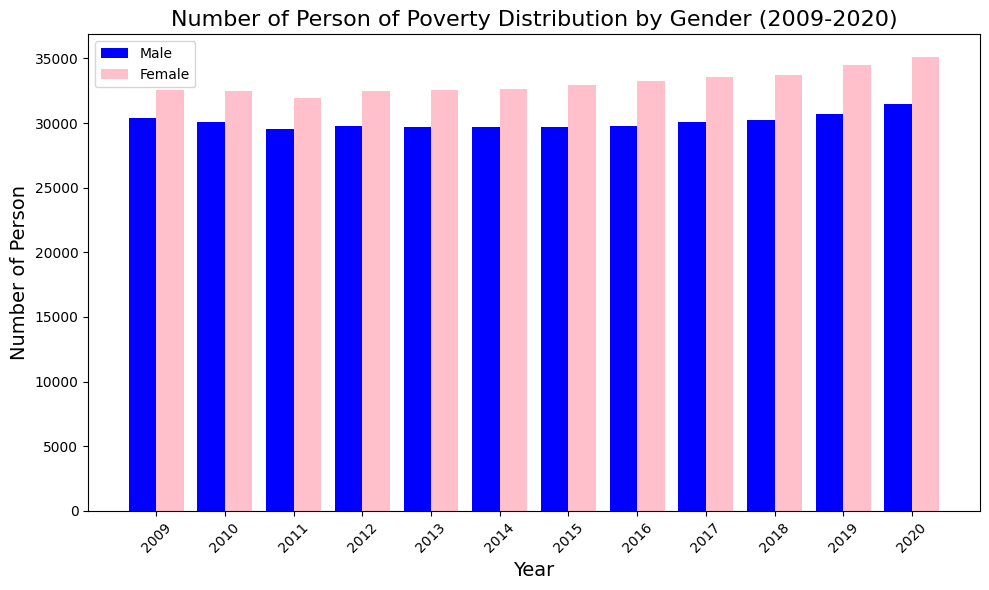

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(gender_data_pivot)

# Create a bar chart
plt.figure(figsize=(10, 6))
width = 0.4
x = df['Year']

plt.bar(x - width / 2, gender_data_pivot['Male'], width=width, label='Male', color='blue')
plt.bar(x + width / 2, gender_data_pivot['Female'], width=width, label='Female', color='pink')

# Chart formatting
plt.title('Number of Person of Poverty Distribution by Gender (2009-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Person', fontsize=14)
plt.xticks(df['Year'], rotation=45)
plt.legend()
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

####Findings:
The topic is about poverty and gender inequality, the relationship of poverty and gender inequality is needed. A bar chat was created with number of person in poverty and gender from 2009 to 2020. It indicates that the female number of person in poverty has always been higher than that of male in the 10 years.  And the gender gap is continually getting bigger. It refers that gender inequality is associated with poverty. Women are more vulnerable to poverty than men, and the lack of equal job opportunities and income may be one of the reasons for women's economic lack.

In [ ]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/lydiainthehouse/7330group/main/'
doc = 'Table 135-08002_en.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
Poverty_rate = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(Poverty_rate)

/content/drive/MyDrive/Colab Notebooks/data/Table 135-08002_en.csv


In [ ]:
df = pd.read_csv(Poverty_rate,skiprows=4)

In [ ]:
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


Type of policy intervention    Year  Unnamed: 2  \
0  Before policy intervention (purely theoretical...  2009.0       541.1   
1  Before policy intervention (purely theoretical...  2010.0       535.5   
2  Before policy intervention (purely theoretical...  2011.0       530.3   
3  Before policy intervention (purely theoretical...  2012.0       540.6   
4  Before policy intervention (purely theoretical...  2013.0       554.9   
5  Before policy intervention (purely theoretical...  2014.0       555.2   
6  Before policy intervention (purely theoretical...  2015.0       569.8   
7  Before policy intervention (purely theoretical...  2016.0       582.2   
8  Before policy intervention (purely theoretical...  2017.0       594.0   
9  Before policy intervention (purely theoretical...  2018.0       612.9   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  
0      1348.4        20.6     25424.4      3900.0  
1      1322.0        20.1     25943.0      4000.0  
2      1295.0        19.6     26891.7      4200.0  
3      1312.3        19.6     28798.4      4400.0  
4      1336.2        19.9     30640.4      4600.0  
5      1324.8        19.6     32785.4      4900.0  
6      1345.0        19.7     35544.7      5200.0  
7      1352.5        19.9     38510.3      5500.0  
8      1376.6        20.1     41457.5      5800.0  
9      1406.5        20.4     44315.5      6000.0

Poverty Rate Trends: Before vs. After Policy Interventions (2009–2020)

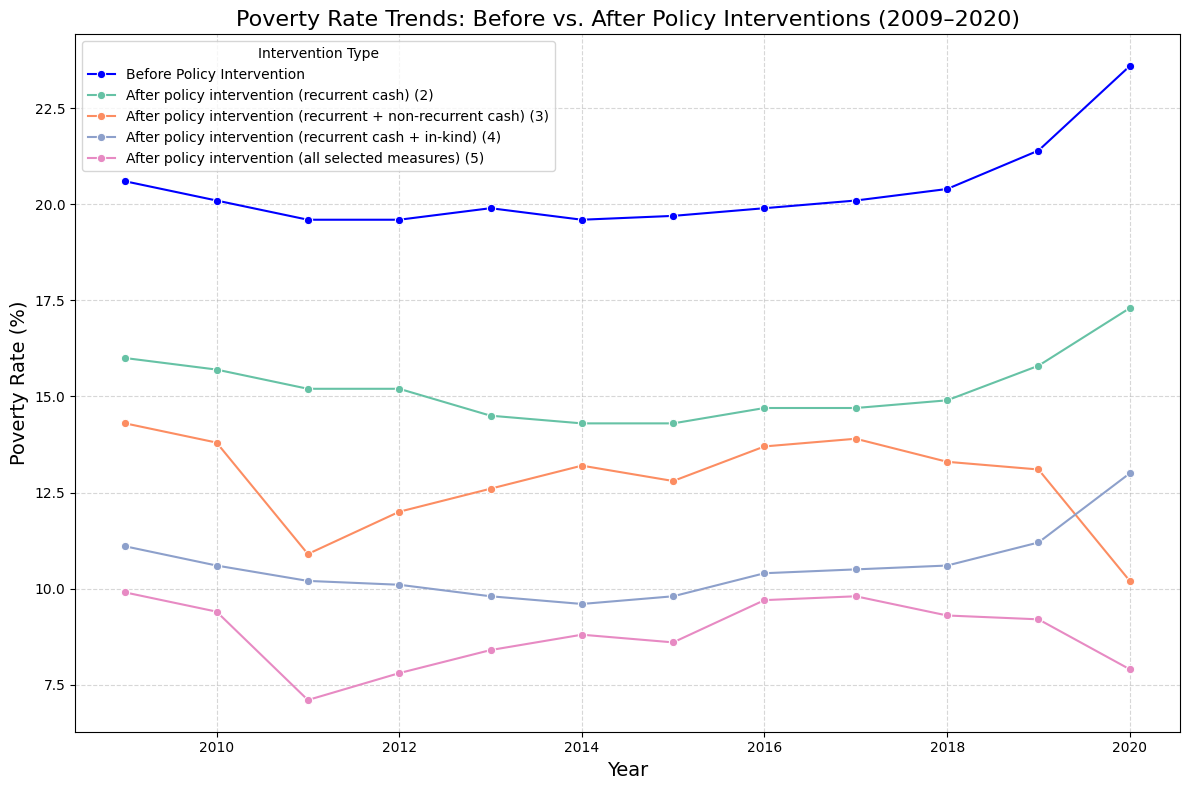

In [ ]:
df_filtered = df[df['Type of policy intervention'].str.contains(
    "Before policy intervention|After policy intervention", na=False)]

# Step 3: Extract relevant columns
df_filtered = df_filtered[["Type of policy intervention", "Year", "Unnamed: 4"]]
df_filtered.columns = ["Intervention Type", "Year", "Poverty Rate (%)"]

# Clean the data
df_filtered["Year"] = pd.to_numeric(df_filtered["Year"], errors="coerce")
df_filtered["Poverty Rate (%)"] = pd.to_numeric(df_filtered["Poverty Rate (%)"], errors="coerce")
df_filtered = df_filtered.dropna()
df_filtered["Year"] = df_filtered["Year"].astype(int)
df_filtered = df_filtered[(df_filtered["Year"] >= 2009) & (df_filtered["Year"] <= 2020)]

# Step 4: Separate data into "Before" and "After" interventions
before_intervention = df_filtered[df_filtered["Intervention Type"].str.contains("Before policy intervention")]
after_intervention = df_filtered[df_filtered["Intervention Type"].str.contains("After policy intervention")]

# Step 5: Visualization
plt.figure(figsize=(12, 8))

# Plot data for "Before Policy Intervention"
sns.lineplot(
    data=before_intervention,
    x="Year",
    y="Poverty Rate (%)",
    label="Before Policy Intervention",
    marker="o",
    color="blue"
)

# Plot data for "After Policy Intervention"
sns.lineplot(
    data=after_intervention,
    x="Year",
    y="Poverty Rate (%)",
    hue="Intervention Type",
    marker="o",
    palette="Set2"
)

# Add titles and labels
plt.title("Poverty Rate Trends: Before vs. After Policy Interventions (2009–2020)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Poverty Rate (%)", fontsize=14)
plt.legend(title="Intervention Type", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

###Findings:
During the exploring the dataset, noticed that policy interventions were perceived as a way for the government to address the problem of poverty. So, the line chart was created to illustrate the impact of policy interventions on poverty rates. The line chart makes clear that the poverty rate is much higher before policy interventions than that after policy interventions. There are four measures for analysing poverty rate after policy interventions. The poverty rate after policy interventions with all selected measures performed the best. It shows that the one with recurrent and non-recurrent cash and the one with all selected measures are in the same trend, which there are big drop in 2011 and 2020. The one with only recurrent cash and the one with recurrent was and in-kind are in the same trend. And the poverty rate after policy interventions with all selected measures performed the best. It refers that the policy interventions have impact on poverty rates, especially with all selected intervention measures.


##JIANGHanbing  CODE Part



1. Violin Plot:Different education levels, relationship between gender and working hours


We want to identify differences in the distribution of working hours between people with high and low education, and whether there are significant differences in the distribution of working hours between genders at each education level.

In [ ]:
import wget
baseURL = 'https://raw.githubusercontent.com/lydiainthehouse/7330group/main/'
doc2 = 'Table working hour.csv'
wholeURL = baseURL + doc2

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
working_hour_groups = wget.download(wholeURL, out=dataPath)

# Print the file name including the local path
print(working_hour_groups)

data_wh = pd.read_csv(working_hour_groups, header=6,encoding='utf-8' )

data_wh.head()

/content/drive/MyDrive/Colab Notebooks/data/Table working hour (1).csv


Year  Educational attainment (2)  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  2012           Primary and below        48.0        45.0        47.0   
1  2012             Lower secondary        48.0        46.0        48.0   
2  2012             Upper secondary        44.3        40.6        42.0   
3  2012              Post-secondary        40.6        40.6        40.6   
4  2012  All educational attainment        41.8        40.6        40.6   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
0        48.0        40.6        43.3        54.0        49.9         53.3   
1        48.0        40.6        45.0        53.0        50.3         52.9   
2        42.0        40.6        40.6        48.0        44.3         46.2   
3        40.6        40.6        40.6        41.9        41.8         41.9   
4        40.6        40.6        40.6        48.0        44.3         45.7   

   Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  \
0         54.0         48.0         49.9         63.0         56.1   
1         53.0         48.0         50.3         60.0         57.0   
2         48.0         44.3         45.7         54.0         49.4   
3         41.8         41.5         41.8         45.7         45.5   
4         47.0         44.3         45.0         54.0         49.4   

   Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  
0         60.0         62.3         54.0         60.0  
1         60.0         60.0         54.0         57.6  
2         54.0         54.0         48.5         51.9  
3         45.7         45.7         45.0         45.7  
4         53.1         54.0         48.2         51.2

In [ ]:
# Clean the data and rename the columns for later analysis
# Rename the 'Unnamed' column to a more meaningful name based on the previous header information

columns = [
    'Year', 'Educational attainment',
    '25th percentile Full-time Male', '25th percentile Full-time Female', '25th percentile Full-time Both sexes',
    '25th percentile All Male', '25th percentile All Female', '25th percentile All Both sexes',
    '50th percentile Full-time Male', '50th percentile Full-time Female', '50th percentile Full-time Both sexes',
    '50th percentile All Male', '50th percentile All Female', '50th percentile All Both sexes',
    '75th percentile Full-time Male', '75th percentile Full-time Female', '75th percentile Full-time Both sexes',
    '75th percentile All Male', '75th percentile All Female', '75th percentile All Both sexes'
]

data_wh.columns = columns


data_wh.head()

Year      Educational attainment  25th percentile Full-time Male  \
0  2012           Primary and below                            48.0   
1  2012             Lower secondary                            48.0   
2  2012             Upper secondary                            44.3   
3  2012              Post-secondary                            40.6   
4  2012  All educational attainment                            41.8   

   25th percentile Full-time Female  25th percentile Full-time Both sexes  \
0                              45.0                                  47.0   
1                              46.0                                  48.0   
2                              40.6                                  42.0   
3                              40.6                                  40.6   
4                              40.6                                  40.6   

   25th percentile All Male  25th percentile All Female  \
0                      48.0                        40.6   
1                      48.0                        40.6   
2                      42.0                        40.6   
3                      40.6                        40.6   
4                      40.6                        40.6   

   25th percentile All Both sexes  50th percentile Full-time Male  \
0                            43.3                            54.0   
1                            45.0                            53.0   
2                            40.6                            48.0   
3                            40.6                            41.9   
4                            40.6                            48.0   

   50th percentile Full-time Female  50th percentile Full-time Both sexes  \
0                              49.9                                  53.3   
1                              50.3                                  52.9   
2                              44.3                                  46.2   
3                              41.8                                  41.9   
4                              44.3                                  45.7   

   50th percentile All Male  50th percentile All Female  \
0                      54.0                        48.0   
1                      53.0                        48.0   
2                      48.0                        44.3   
3                      41.8                        41.5   
4                      47.0                        44.3   

   50th percentile All Both sexes  75th percentile Full-time Male  \
0                            49.9                            63.0   
1                            50.3                            60.0   
2                            45.7                            54.0   
3                            41.8                            45.7   
4                            45.0                            54.0   

   75th percentile Full-time Female  75th percentile Full-time Both sexes  \
0                              56.1                                  60.0   
1                              57.0                                  60.0   
2                              49.4                                  54.0   
3                              45.5                                  45.7   
4                              49.4                                  53.1   

   75th percentile All Male  75th percentile All Female  \
0                      62.3                        54.0   
1                      60.0                        54.0   
2                      54.0                        48.5   
3                      45.7                        45.0   
4                      54.0                        48.2   

   75th percentile All Both sexes  
0                            60.0  
1                            57.6  
2                            51.9  
3                            45.7  
4                            51.2

In [ ]:
# Convert the data to long format, focusing only on the relationship between education and work hours.
# Combine the work hours data for the 25th, 50th, and 75th percentiles, and label them with their education level and gender.

# Use pd.melt to convert the data into long format
melted_data = pd.melt(data_wh, id_vars=['Year', 'Educational attainment'],
                          value_vars=[
                              '25th percentile Full-time Male', '25th percentile Full-time Female',
                              '25th percentile Full-time Both sexes',
                              '50th percentile Full-time Male', '50th percentile Full-time Female',
                              '50th percentile Full-time Both sexes',
                              '75th percentile Full-time Male', '75th percentile Full-time Female',
                              '75th percentile Full-time Both sexes'
                          ],
                          var_name='Percentile and Gender', value_name='Working Hours')

# Extract percentile and gender information from the 'Percentile and Gender' column
melted_data['Percentile'] = melted_data['Percentile and Gender'].str.extract(r'(25th|50th|75th)')
melted_data['Gender'] = melted_data['Percentile and Gender'].str.extract(r'(Male|Female|Both sexes)')


melted_data.head()

Year      Educational attainment           Percentile and Gender  \
0  2012           Primary and below  25th percentile Full-time Male   
1  2012             Lower secondary  25th percentile Full-time Male   
2  2012             Upper secondary  25th percentile Full-time Male   
3  2012              Post-secondary  25th percentile Full-time Male   
4  2012  All educational attainment  25th percentile Full-time Male   

   Working Hours Percentile Gender  
0           48.0       25th   Male  
1           48.0       25th   Male  
2           44.3       25th   Male  
3           40.6       25th   Male  
4           41.8       25th   Male

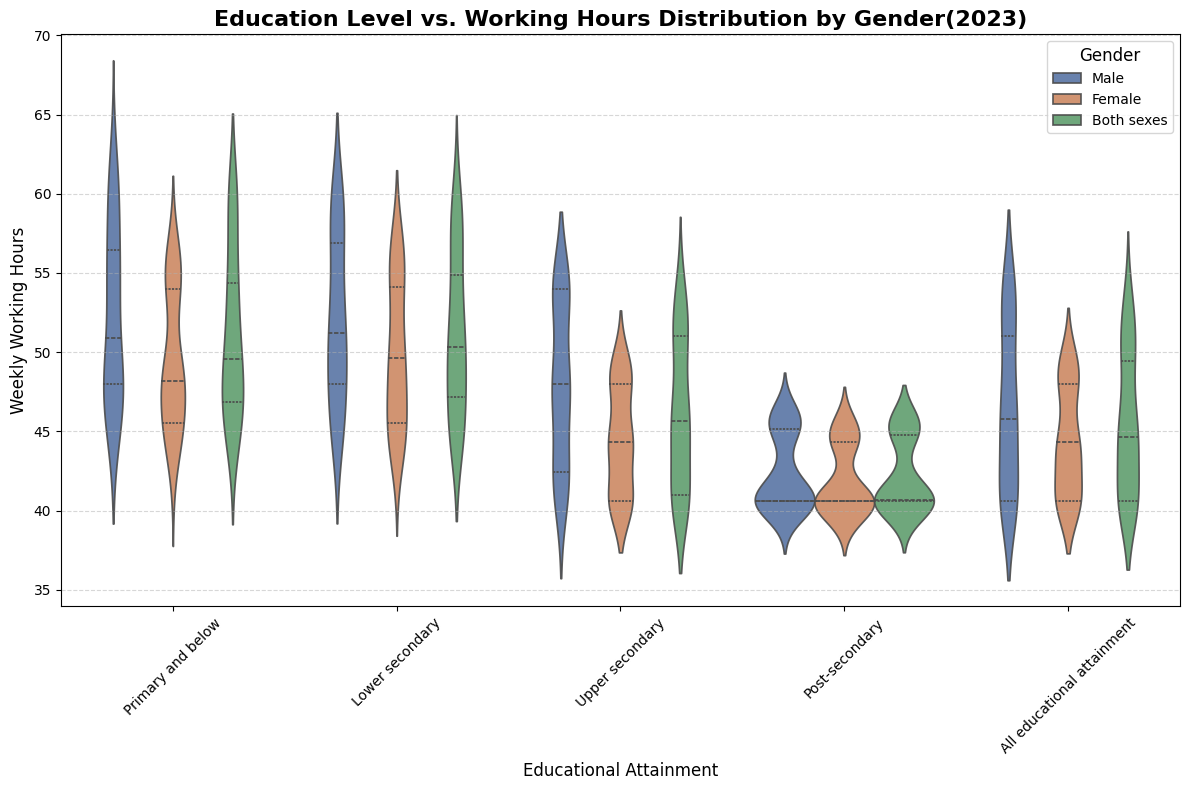

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))


palette = {'Male': '#4C72B0', 'Female': '#DD8452', 'Both sexes': '#55A868'}

sns.violinplot(
    data=melted_data,
    x='Educational attainment',
    y='Working Hours',
    hue='Gender',
    inner='quartile',
    palette=palette,
    alpha=0.9
)

# Add title and axis labels
plt.title('Education Level vs. Working Hours Distribution by Gender(2023)', fontsize=16, fontweight='bold')
plt.xlabel('Educational Attainment', fontsize=12)
plt.ylabel('Weekly Working Hours', fontsize=12)

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45, fontsize=10)

# Set the legend style
plt.legend(title='Gender', fontsize=10, title_fontsize=12, loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

### Findings:
Through violin plot length and median line,we can see , The higher the education level, the shorter the working hours.

In the post-secondary setting, men and women work similar hours, but at lower education levels, women’s weekly working hours are generally shorter.

We speculate that higher education levels may give women more career options and skills, making them more likely to enter full-time jobs or high-hour jobs, while at lower education levels, women may be more likely to work part-time or drop out of the labor force.

So the next part we analayst  the relationship between gender and labor force participation rates

 2. JIANGHanbing  Stacked Chart:The relationship between gender and labor force participation rates


We want to know what are the differences in labor force participation rates between men and women at different education levels?
Which educational levels have the largest gender differences?

In [ ]:
import wget
baseURL = 'https://raw.githubusercontent.com/lydiainthehouse/7330group/main/'
doc3 = 'Table labour force participation rate.csv'
wholeURL1 = baseURL + doc3

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
rate_groups = wget.download(wholeURL1, out=dataPath)

# Print the file name including the local path
print(rate_groups)

data_rate = pd.read_csv(rate_groups,encoding='utf-8' )

data_rate.head()

/content/drive/MyDrive/Colab Notebooks/data/Table labour force participation rate (1).csv


Age group                  Unnamed: 1           15 - 24  \
0       Sex                         NaN              Male   
1       NaN                         NaN  Labour force (1)   
2       NaN                         NaN        No. ('000)   
3      Year  Educational attainment (3)               NaN   
4      2023                   Secondary             28400   

                             15 - 24.1         15 - 24.2  \
0                                 Male            Female   
1  Labour force participation rate (2)  Labour force (1)   
2                                  (%)        No. ('000)   
3                                  NaN               NaN   
4                                 20.3             19900   

                             15 - 24.3         15 - 24.4  \
0                               Female        Both sexes   
1  Labour force participation rate (2)  Labour force (1)   
2                                  (%)        No. ('000)   
3                                  NaN               NaN   
4                                 16.4             48300   

                             15 - 24.5           25 - 39  \
0                           Both sexes              Male   
1  Labour force participation rate (2)  Labour force (1)   
2                                  (%)        No. ('000)   
3                                  NaN               NaN   
4                                 18.5            220700   

                             25 - 39.1  ...     40 and over.2  \
0                                 Male  ...            Female   
1  Labour force participation rate (2)  ...  Labour force (1)   
2                                  (%)  ...        No. ('000)   
3                                  NaN  ...               NaN   
4                                   91  ...            658600   

                         40 and over.3     40 and over.4  \
0                               Female        Both sexes   
1  Labour force participation rate (2)  Labour force (1)   
2                                  (%)        No. ('000)   
3                                  NaN               NaN   
4                                 51.1           1330900   

                         40 and over.5  Aged 15 and over  \
0                           Both sexes              Male   
1  Labour force participation rate (2)  Labour force (1)   
2                                  (%)        No. ('000)   
3                                  NaN               NaN   
4                                 56.7            921400   

                    Aged 15 and over.1 Aged 15 and over.2  \
0                                 Male             Female   
1  Labour force participation rate (2)   Labour force (1)   
2                                  (%)         No. ('000)   
3                                  NaN                NaN   
4                                 63.9             931900   

                    Aged 15 and over.3 Aged 15 and over.4  \
0                               Female         Both sexes   
1  Labour force participation rate (2)   Labour force (1)   
2                                  (%)         No. ('000)   
3                                  NaN                NaN   
4                                 53.4            1853300   

                    Aged 15 and over.5  
0                           Both sexes  
1  Labour force participation rate (2)  
2                                  (%)  
3                                  NaN  
4                                 58.1  

[5 rows x 26 columns]

In [ ]:
# Reread the data and skip the first few lines of useless information
data_cleaned = pd.read_csv(rate_groups, skiprows=4)
# View the cleaned data
data_cleaned.head()

Year       Educational attainment (3)  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  2023                        Secondary       28400        20.3       19900   
1  2023              Lower secondary (4)        4300        19.2        2700   
2  2023              Upper secondary (5)       24100        20.5       17200   
3  2023               Post-secondary (6)       64200        38.4       72900   
4  2023  Post-secondary - non-degree (7)       19200        43.8       17300   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0        16.4       48300        18.5      220700        91.0  ...   
1        16.6        7000        18.1       38600        86.7  ...   
2        16.4       41300        18.5      182100        92.0  ...   
3        41.0      137100        39.7      381800        92.7  ...   
4        45.3       36600        44.5       89000        92.1  ...   

   Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  \
0       658600         51.1      1330900         56.7       921400   
1       184400         42.9       426900         50.8       285400   
2       474200         55.2       904100         59.9       636000   
3       346600         64.6       765500         69.7       864900   
4        86600         56.3       183500         62.5       205200   

   Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  
0         63.9       931900         53.4      1853300         58.1  
1         59.8       220900         44.1       506400         51.7  
2         65.9       711000         57.2      1347000         61.0  
3         75.9       835300         69.4      1700200         72.5  
4         73.2       186000         63.1       391200         68.0  

[5 rows x 26 columns]

In [ ]:
# Extract relevant columns: education level, male labor force participation rate, female labor force participation rate
# Assume that column 3 is education level, column 4 is male participation rate, and column 6 is female participation rate (based on preliminary observations)

# Extract data on education level, male and female labor force participation rates
education_level = data_cleaned.iloc[:, 1]  # 教育水平
male_participation_rate = data_cleaned.iloc[:, 3]  # 男性劳动人口参与率
female_participation_rate = data_cleaned.iloc[:, 5]  # 女性劳动人口参与率

# Create a new DataFrame to store this data
df_participation = pd.DataFrame({
    'Education Level': education_level,
    'Male Participation Rate (%)': male_participation_rate,
    'Female Participation Rate (%)': female_participation_rate
})

df_participation.head()

Education Level  Male Participation Rate (%)  \
0                        Secondary                         20.3   
1              Lower secondary (4)                         19.2   
2              Upper secondary (5)                         20.5   
3               Post-secondary (6)                         38.4   
4  Post-secondary - non-degree (7)                         43.8   

   Female Participation Rate (%)  
0                           16.4  
1                           16.6  
2                           16.4  
3                           41.0  
4                           45.3

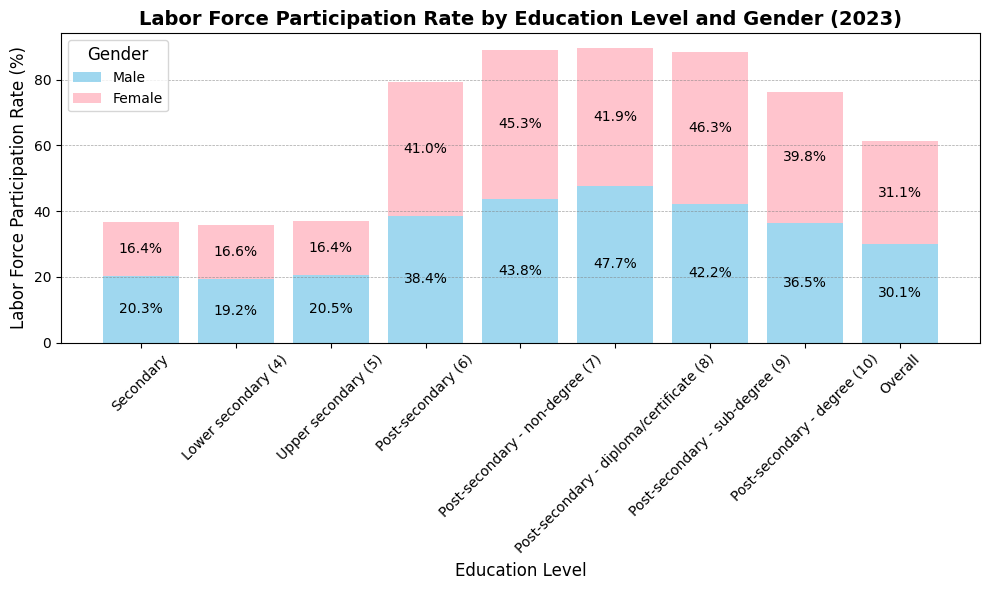

In [ ]:
import matplotlib.pyplot as plt

df_participation['Male Participation Rate (%)'] = pd.to_numeric(df_participation['Male Participation Rate (%)'], errors='coerce')
df_participation['Female Participation Rate (%)'] = pd.to_numeric(df_participation['Female Participation Rate (%)'], errors='coerce')

plt.figure(figsize=(10, 6))


male_color = '#87CEEB'  # 淡蓝色
female_color = '#FFB6C1'  # 淡粉色

# Plot male participation rate
plt.bar(
    df_participation['Education Level'],
    df_participation['Male Participation Rate (%)'],
    label='Male',
    color=male_color,
    alpha=0.8
)

# Plot female participation rate (stacked on male)
plt.bar(
    df_participation['Education Level'],
    df_participation['Female Participation Rate (%)'],
    bottom=df_participation['Male Participation Rate (%)'],
    label='Female',
    color=female_color,
    alpha=0.8
)

# Add numerical annotation
for idx, row in df_participation.iterrows():
    # male
    plt.text(idx, row['Male Participation Rate (%)'] / 2, f"{row['Male Participation Rate (%)']}%",
             ha='center', va='center', fontsize=10, color='black')
    # female
    total = row['Male Participation Rate (%)'] + row['Female Participation Rate (%)']
    plt.text(idx, row['Male Participation Rate (%)'] + row['Female Participation Rate (%)'] / 2, f"{row['Female Participation Rate (%)']}%",
             ha='center', va='center', fontsize=10, color='black')

# Add grid lines
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add title and labels
plt.title('Labor Force Participation Rate by Education Level and Gender (2023)', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Labor Force Participation Rate (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)


plt.legend(title='Gender', fontsize=10, title_fontsize=12, loc='upper left')


plt.tight_layout()
plt.show()

### Findings:
At lower education levels (primary and secondary education), the labor force participation rate of men is significantly higher than that of women, especially at the "Upper secondary" stage, where the gender gap is the largest (4.0%). This may be related to the restrictions of traditional gender roles (such as more family responsibilities) on women at this stage.

At the stage of higher education, the labor force participation rate of women is higher than that of men (the gender gap is -2.6%). This shows that higher education provides more career opportunities and motivation for women, narrowing the gender gap and even achieving a reverse.

3. Line chart + bar chart: The relationship between gender and Wage




Does higher education really improve women's social status? Are wages equal for men and women with the same academic qualifications?
Education level is usually positively correlated with salary. By analyzing the changes in women's wages with educational level, we can determine whether higher education has significantly improved women's economic status.

In [ ]:
import wget
baseURL = 'https://raw.githubusercontent.com/lydiainthehouse/7330group/main/'
doc4 = 'Table employment earnings.csv'
wholeURL2 = baseURL + doc4

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
earnings_groups = wget.download(wholeURL2, out=dataPath)

# Print the file name including the local path
print(earnings_groups)

data_rate = pd.read_csv(earnings_groups,encoding='GBK' )

data_rate.head()

/content/drive/MyDrive/Colab Notebooks/data/Table employment earnings (1).csv


Year Educational attainment (3)  Male（HK$）  Female（HK$）  \
0  2023          Primary and below      15000        12000   
1  2023                  Secondary      19900        15200   
2  2023        Lower secondary (4)      18000        13000   
3  2023        Upper secondary (5)      20000        16400   
4  2023         Post-secondary (6)      33100        29200   

   Gender wage ratio（female/male）  Both sexes（HK$）  
0                        0.800000            13000  
1                        0.763819            17500  
2                        0.722222            15200  
3                        0.820000            18100  
4                        0.882175            30000

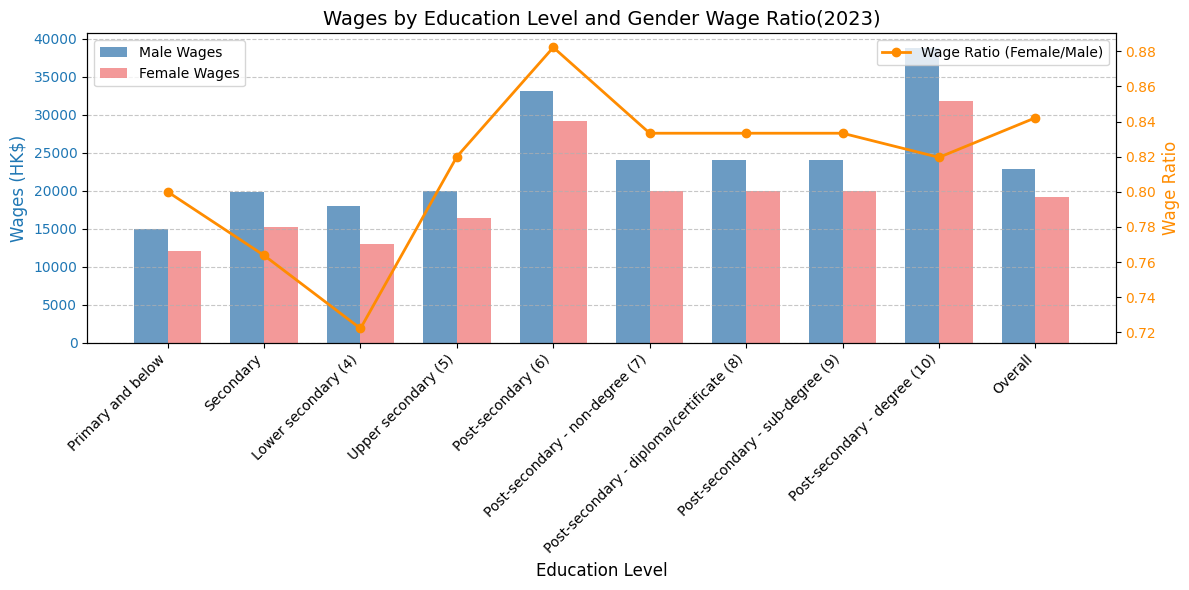

In [ ]:
# Extract data
education_levels = data_rate['Educational attainment (3)']
male_wages = data_rate['Male（HK$）']
female_wages = data_rate['Female（HK$）']
wage_ratio = data_rate['Gender wage ratio（female/male）']

# Set the width and offset of the bar chart
bar_width = 0.35
x_indices = np.arange(len(education_levels))


fig, ax1 = plt.subplots(figsize=(12, 6))

# Draw a bar chart of male and female wages, adjusting width and position to avoid overlap
ax1.bar(x_indices - bar_width / 2, male_wages, width=bar_width, color='steelblue', label='Male Wages', alpha=0.8)
ax1.bar(x_indices + bar_width / 2, female_wages, width=bar_width, color='lightcoral', label='Female Wages', alpha=0.8)

# Set the first y-axis (salary)
ax1.set_xlabel('Education Level', fontsize=12)
ax1.set_ylabel('Wages (HK$)', fontsize=12, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(x_indices)
ax1.set_xticklabels(education_levels, rotation=45, ha='right', fontsize=10)  # 旋转x轴标签以防止重叠

# Create a second y-axis to plot the salary ratio
ax2 = ax1.twinx()
ax2.plot(x_indices, wage_ratio, color='darkorange', marker='o', label='Wage Ratio (Female/Male)', linewidth=2)
ax2.set_ylabel('Wage Ratio', fontsize=12, color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Add a chart title
plt.title('Wages by Education Level and Gender Wage Ratio(2023)', fontsize=14)

# Add a legend
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Add grid lines to improve readability
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

plt.show()

### Findings:
From the bar chart,we can see Regardless of education level, men earn more than women.

Through line chart, If the gender wage ratio continues to rise, it proves that education reduces gender inequality in wages.

After lower secondary education, the wage ratio increases significantly, indicating that improving academic qualifications at this time can reduce gender inequality.

After that, the wage inequality between men and women decreases and then stabilizes, indicating that education does not reduce gender inequality in wages.

# **HuoXinran CODE Part**

1. Overall industry comparison

In [ ]:
# First, read the CSV file uploaded by the user as required and set the option to display all columns.
import pandas as pd

pd.set_option('display.max_columns', None)

file_path = '/content/Table 220-19013_en_0.csv'
data = pd.read_csv(file_path, header=None)

data.head()

0    1    \
0  Table 220-19013 : Average monthly salaries, av...  NaN   
1                                                     NaN   
2                                                           
3                                                NaN  NaN   
4                                               Year  NaN   

                            2                             3    \
0                           NaN                           NaN   
1                           NaN                           NaN   
2  Average monthly salaries (1)  Average monthly salaries (1)   
3                           HK$                           HK$   
4                          2016                          2016   

                            4                             5    \
0                           NaN                           NaN   
1                           NaN                           NaN   
2  Average monthly salaries (1)  Average monthly salaries (1)   
3                           HK$                           HK$   
4                          2016                          2016   

                            6                             7    \
0                           NaN                           NaN   
1                           NaN                           NaN   
2  Average monthly salaries (1)  Average monthly salaries (1)   
3                           HK$                           HK$   
4                          2016                          2016   

                            8                             9    \
0                           NaN                           NaN   
1                           NaN                           NaN   
2  Average monthly salaries (1)  Average monthly salaries (1)   
3                           HK$                           HK$   
4                          2016                          2016   

                            10                            11   \
0                           NaN                           NaN   
1                           NaN                           NaN   
2  Average monthly salaries (1)  Average monthly salaries (1)   
3                           HK$                           HK$   
4                          2016                          2017   

                            12                            13   \
0                           NaN                           NaN   
1                           NaN                           NaN   
2  Average monthly salaries (1)  Average monthly salaries (1)   
3                           HK$                           HK$   
4                          2017                          2017   

                            14                            15   \
0                           NaN                           NaN   
1                           NaN                           NaN   
2  Average monthly salaries (1)  Average monthly salaries (1)   
3                           HK$                           HK$   
4                          2017                          2017   

                            16                            17   \
0                           NaN                           NaN   
1                           NaN                           NaN   
2  Average monthly salaries (1)  Average monthly salaries (1)   
3                           HK$                           HK$   
4                          2017                          2017   

                            18                            19   \
0                           NaN                           NaN   
1                           NaN                           NaN   
2  Average monthly salaries (1)  Average monthly salaries (1)   
3                           HK$                           HK$   
4                          2017                          2017   

                            20                            21   \
0                           NaN                           NaN   
1                           NaN  

In [ ]:
data_cleaned = pd.read_csv(file_path, skiprows=5, header=None)
data_cleaned.head()

0                                                  1    \
0                Month                                                NaN   
1                  Sex                                                NaN   
2             Industry     Broad occupational group/example of occupation   
3  Chinese restaurants  Supervisory, technical, clerical, service and ...   
4  Chinese restaurants                                    Service workers   

     2       3           4      5       6           7      8       9    \
0    Jun     Jun         Jun    Sep     Sep         Sep    Dec     Dec   
1   Male  Female  Both sexes   Male  Female  Both sexes   Male  Female   
2    NaN     NaN         NaN    NaN     NaN         NaN    NaN     NaN   
3  18031   12346       14818  18338   12420       15062  18817   12762   
4  17963   12282       15223  18294   12274       15441  18773   12743   

          10     11      12          13     14      15          16     17   \
0         Dec    Mar     Mar         Mar    Jun     Jun         Jun    Sep   
1  Both sexes   Male  Female  Both sexes   Male  Female  Both sexes   Male   
2         NaN    NaN     NaN         NaN    NaN     NaN         NaN    NaN   
3       15435  19088   12790       15595  19258   13265       16036  19583   
4       15865  18900   12755       15982  19146   13082       16326  19464   

      18          19     20      21          22     23      24          25   \
0     Sep         Sep    Dec     Dec         Dec    Mar     Mar         Mar   
1  Female  Both sexes   Male  Female  Both sexes   Male  Female  Both sexes   
2     NaN         NaN    NaN     NaN         NaN    NaN     NaN         NaN   
3   13354       16351  19853   13654       16621  19815   13612       16532   
4   13113       16638  19930   13469       17071  19741   13531       17050   

     26      27          28     29      30          31     32      33   \
0    Jun     Jun         Jun    Sep     Sep         Sep    Dec     Dec   
1   Male  Female  Both sexes   Male  Female  Both sexes   Male  Female   
2    NaN     NaN         NaN    NaN     NaN         NaN    NaN     NaN   
3  20254   14094       17114  20349   13999       17116  20361   14208   
4  20145   13999       17451  20053   14036       17496  20132   14173   

          34     35      36          37     38      39          40     41   \
0         Dec    Mar     Mar         Mar    Jun     Jun         Jun    Sep   
1  Both sexes   Male  Female  Both sexes   Male  Female  Both sexes   Male   
2         NaN    NaN     NaN         NaN    NaN     NaN         NaN    NaN   
3       17222  20319   13960       16961  21269   14297       17562  20744   
4       17627  20160   13924       17373  20987   14097       17884  20687   

      42          43     44      45          46     47      48          49   \
0     Sep         Sep    Dec     Dec         Dec    Mar     Mar         Mar   
1  Female  Both sexes   Male  Female  Both sexes   Male  Female  Both sexes   
2     NaN         NaN    NaN     NaN         NaN    NaN     NaN         NaN   
3   14178       17420  20947   14418       17535  21016   14294       17510   
4   13727       17831  20789   14213       17947  20832   14087       17930   

     50      51          52     53      54          55     56      57   \
0    Jun     Jun         Jun    Sep     Sep         Sep    Dec     Dec   
1   Male  Female  Both sexes   Male  Female  Both sexes   Male  Female   
2    NaN     NaN         NaN    NaN     NaN         NaN    NaN     NaN   
3  20895   14591       17454  20687   14651       17381  20874   14827   
4  20765   14571       17884  20622   14761       17903  20790   14756   

          58     59      60          61     62      63          64     65   \
0         Dec    Mar     Mar         Mar    Jun     Jun         Jun    Sep   
1  Both sexes   Male  Female  Both sexes   Male  Female  Both sexes   Male   
2         NaN    NaN     NaN         NaN    NaN     NaN         NaN    NaN   
3       17556  20394 

In [ ]:
# Extract the data for the last year (assuming it is 2023)
# First, we need to find the structure of the data and extract the relevant columns
# By observation, the first row is the month, the second row is the gender, and the third row starts with the data

# Extract useful columns: industry, gender, salary data
columns = data_cleaned.iloc[1].fillna('') + ' ' + data_cleaned.iloc[0].fillna('')
data_2023 = data_cleaned.iloc[3:].copy()
data_2023.columns = columns
data_2023_cleaned = data_2023.dropna(how='all')
data_2023_cleaned.head()

Sex Month                                                     \
3  Chinese restaurants  Supervisory, technical, clerical, service and ...   
4  Chinese restaurants                                    Service workers   
5  Chinese restaurants                                            Bus Boy   
6  Chinese restaurants               Miscellaneous non-production workers   
7  Chinese restaurants                                         Dishwasher   

  Male Jun Female Jun Both sexes Jun Male Sep Female Sep Both sexes Sep  \
3    18031      12346          14818    18338      12420          15062   
4    17963      12282          15223    18294      12274          15441   
5     [*1]      10550          10569     [*1]      10702          10695   
6    10964      11816          11687    10627      11886          11690   
7     [*1]      11899          11948     [*1]      12067          12084   

  Male Dec Female Dec Both sexes Dec Male Mar Female Mar Both sexes Mar  \
3    18817      12762          15435    19088      12790          15595   
4    18773      12743          15865    18900      12755          15982   
5     [*1]      10645          10672     [*1]      10817          10836   
6    10980      12188          11933    11100      12262          12059   
7     [*1]      12220          12231     [*1]      12278          12275   

  Male Jun Female Jun Both sexes Jun Male Sep Female Sep Both sexes Sep  \
3    19258      13265          16036    19583      13354          16351   
4    19146      13082          16326    19464      13113          16638   
5     [*1]      11123          11128     [*1]      11203          11220   
6    11675      12684          12446    11702      12748          12527   
7     [*1]      12708          12663     [*1]      12797          12767   

  Male Dec Female Dec Both sexes Dec Male Mar Female Mar Both sexes Mar  \
3    19853      13654          16621    19815      13612          16532   
4    19930      13469          17071    19741      13531          17050   
5     [*1]      11209          11236     [*1]      11304          11321   
6    11690      12912          12625    11929      12941          12763   
7     [*1]      12975          12891     [*1]      13007          12968   

  Male Jun Female Jun Both sexes Jun Male Sep Female Sep Both sexes Sep  \
3    20254      14094          17114    20349      13999          17116   
4    20145      13999          17451    20053      14036          17496   
5     [*1]      11555          11608     [*1]      11672          11739   
6    11998      13241          12977    12152      13312          13089   
7     [*1]      13301          13195     [*1]      13341          13319   

  Male Dec Female Dec Both sexes Dec Male Mar Female Mar Both sexes Mar  \
3    20361      14208          17222    20319      13960          16961   
4    20132      14173          17627    20160      13924          17373   
5     [*1]      11722          11785     [*1]      11862          11895   
6    12452      13365          13192    12585      13488          13322   
7     [*1]      13397          13439     [*1]      13563          13584   

  Male Jun Female Jun Both sexes Jun Male Sep Female Sep Both sexes Sep  \
3    21269      14297          17562    20744      14178          17420   
4    20987      14097          17884    20687      13727          17831   
5     [*1]      12208          12211     [*1]      12254          12305   
6    12939      13865          13683    13012      14066          13815   
7     [*1]      13810          13868     [*1]      13921          13941   

  Male Dec Female Dec Both sexes Dec Male Mar Female Mar Both sexes Mar  \
3    20947      14418          17535    21016      14294          17510   
4    20789      14213          17947    20832      14087          17930   
5     [*1]      12219          12299     [*1]      12254          12276   
6    13425      14085          13941    12937      14078          13833   
7     [*1]      14

In [ ]:
# Select industry, gender and 2023 salary data columns
industry_column = data_cleaned.iloc[2:, 0].reset_index(drop=True)
sex_month_columns = data_cleaned.iloc[2:, 1].reset_index(drop=True)
salary_columns = data_cleaned.iloc[2:, 2:].apply(pd.to_numeric, errors='coerce')

# Merging industry, gender and wage data
data_2023_final = pd.concat([industry_column, sex_month_columns, salary_columns], axis=1)
columns_name = ['Industry', 'Sex_Month'] + list(data_cleaned.iloc[0, 2:])
data_2023_final.columns = columns_name
data_2023_final.head()

Industry                                          Sex_Month  \
0             Industry     Broad occupational group/example of occupation   
1  Chinese restaurants  Supervisory, technical, clerical, service and ...   
2  Chinese restaurants                                    Service workers   
3  Chinese restaurants                                            Bus Boy   
4  Chinese restaurants               Miscellaneous non-production workers   

       Jun      Jun      Jun      Sep      Sep      Sep      Dec      Dec  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3  18031.0  12346.0  14818.0  18338.0  12420.0  15062.0  18817.0  12762.0   
4  17963.0  12282.0  15223.0  18294.0  12274.0  15441.0  18773.0  12743.0   

       Dec      Mar      Mar      Mar      Jun      Jun      Jun      Sep  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3  15435.0  19088.0  12790.0  15595.0  19258.0  13265.0  16036.0  19583.0   
4  15865.0  18900.0  12755.0  15982.0  19146.0  13082.0  16326.0  19464.0   

       Sep      Sep      Dec      Dec      Dec      Mar      Mar      Mar  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3  13354.0  16351.0  19853.0  13654.0  16621.0  19815.0  13612.0  16532.0   
4  13113.0  16638.0  19930.0  13469.0  17071.0  19741.0  13531.0  17050.0   

       Jun      Jun      Jun      Sep      Sep      Sep      Dec      Dec  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3  20254.0  14094.0  17114.0  20349.0  13999.0  17116.0  20361.0  14208.0   
4  20145.0  13999.0  17451.0  20053.0  14036.0  17496.0  20132.0  14173.0   

       Dec      Mar      Mar      Mar      Jun      Jun      Jun      Sep  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3  17222.0  20319.0  13960.0  16961.0  21269.0  14297.0  17562.0  20744.0   
4  17627.0  20160.0  13924.0  17373.0  20987.0  14097.0  17884.0  20687.0   

       Sep      Sep      Dec      Dec      Dec      Mar      Mar      Mar  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3  14178.0  17420.0  20947.0  14418.0  17535.0  21016.0  14294.0  17510.0   
4  13727.0  17831.0  20789.0  14213.0  17947.0  20832.0  14087.0  17930.0   

       Jun      Jun      Jun      Sep      Sep      Sep      Dec      Dec  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3  20895.0  14591.0  17454.0  20687.0  14651.0  17381.0  20874.0  14827.0   
4  20765.0  14571.0  17884.0  20622.0  14761.0  17903.0  20790.0  14756.0   

       Dec      Mar      Mar      Mar      Jun      Jun      Jun      Sep  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3 

In [ ]:
industry_column = data_cleaned.iloc[3:, 0].reset_index(drop=True)
sex_column = data_cleaned.iloc[3:, 1].reset_index(drop=True)
salary_columns_2023 = data_cleaned.iloc[3:, 2:-12].apply(pd.to_numeric, errors='coerce')

# Merging industry, gender and salary data to 2023
data_2023_final = pd.concat([industry_column, sex_column, salary_columns_2023], axis=1)
columns_name = ['Industry', 'Sex_Month'] + [f'Salary_{i}' for i in range(1, salary_columns_2023.shape[1] + 1)]
data_2023_final.columns = columns_name
data_2023_final_cleaned = data_2023_final.dropna(how='all', subset=columns_name[2:])
data_2023_final_cleaned.head()

Industry  \
3                                Chinese restaurants   
4                                Chinese restaurants   
5  Real estate maintenance management (more commo...   
6  Real estate maintenance management (more commo...   
7  Real estate maintenance management (more commo...   

                                           Sex_Month  Salary_1  Salary_2  \
3               Miscellaneous non-production workers   18031.0   12346.0   
4                                         Dishwasher   17963.0   12282.0   
5  Supervisory, technical, clerical, service and ...       NaN   10550.0   
6                  Supervisory and technical workers   10964.0   11816.0   
7                              Accounting supervisor       NaN   11899.0   

   Salary_3  Salary_4  Salary_5  Salary_6  Salary_7  Salary_8  Salary_9  \
3   14818.0   18338.0   12420.0   15062.0   18817.0   12762.0   15435.0   
4   15223.0   18294.0   12274.0   15441.0   18773.0   12743.0   15865.0   
5   10569.0       NaN   10702.0   10695.0       NaN   10645.0   10672.0   
6   11687.0   10627.0   11886.0   11690.0   10980.0   12188.0   11933.0   
7   11948.0       NaN   12067.0   12084.0       NaN   12220.0   12231.0   

   Salary_10  Salary_11  Salary_12  Salary_13  Salary_14  Salary_15  \
3    19088.0    12790.0    15595.0    19258.0    13265.0    16036.0   
4    18900.0    12755.0    15982.0    19146.0    13082.0    16326.0   
5        NaN    10817.0    10836.0        NaN    11123.0    11128.0   
6    11100.0    12262.0    12059.0    11675.0    12684.0    12446.0   
7        NaN    12278.0    12275.0        NaN    12708.0    12663.0   

   Salary_16  Salary_17  Salary_18  Salary_19  Salary_20  Salary_21  \
3    19583.0    13354.0    16351.0    19853.0    13654.0    16621.0   
4    19464.0    13113.0    16638.0    19930.0    13469.0    17071.0   
5        NaN    11203.0    11220.0        NaN    11209.0    11236.0   
6    11702.0    12748.0    12527.0    11690.0    12912.0    12625.0   
7        NaN    12797.0    12767.0        NaN    12975.0    12891.0   

   Salary_22  Salary_23  Salary_24  Salary_25  Salary_26  Salary_27  \
3    19815.0    13612.0    16532.0    20254.0    14094.0    17114.0   
4    19741.0    13531.0    17050.0    20145.0    13999.0    17451.0   
5        NaN    11304.0    11321.0        NaN    11555.0    11608.0   
6    11929.0    12941.0    12763.0    11998.0    13241.0    12977.0   
7        NaN    13007.0    12968.0        NaN    13301.0    13195.0   

   Salary_28  Salary_29  Salary_30  Salary_31  Salary_32  Salary_33  \
3    20349.0    13999.0    17116.0    20361.0    14208.0    17222.0   
4    20053.0    14036.0    17496.0    20132.0    14173.0    17627.0   
5        NaN    11672.0    11739.0        NaN    11722.0    11785.0   
6    12152.0    13312.0    13089.0    12452.0    13365.0    13192.0   
7        NaN    13341.0    13319.0        NaN    13397.0    13439.0   

   Salary_34  Salary_35  Salary_36  Salary_37  Salary_38  Salary_39  \
3    20319.0    13960.0    16961.0    21269.0    14297.0    17562.0   
4    20160.0    13924.0    17373.0    20987.0    14097.0    17884.0   
5        NaN    11862.0    11895.0        NaN    12208.0    12211.0   
6    12585.0    13488.0    13322.0    12939.0    13865.0    13683.0   
7        NaN    13563.0    13584.0        NaN    13810.0    13868.0   

   Salary_40  Salary_41  Salary_42  Salary_43  Salary_44  Salary_45  \
3    20744.0    14178.0    17420.0    20947.0    14418.0    17535.0   
4    20687.0    13727.0    17831.0    20789.0    14213.0    17947.0   
5        NaN    12254.0    12305.0        NaN    12219.0    12299.0   
6    13012.0    14066.0    13815.0    13425.0    14085.0    13941.0   
7        NaN    13921.0    13941.0        NaN    14027.0    14026.0   

   Salary_46  Salary_47  Salary_48  Salary_49  Salary_50  Salary_51  \
3    21016.0    14294.0    17510.0    20895.0    14591.0    17454.0   
4    20832.0    14087.0    17930.0    20765.0    14571.0    17884.0   
5        NaN    12254.0 

In [ ]:
data_2023_long = pd.melt(data_2023_final_cleaned, id_vars=['Industry', 'Sex_Month'],
                               var_name='Month', value_name='Salary')
# Separate gender and month information
data_2023_long['Sex'] = data_2023_long['Sex_Month'].str.split().str[0]
data_2023_long['Month'] = data_2023_long['Sex_Month'].str.split().str[1]

# Remove invalid rows (such as rows without salary data)）
data_2023_long_cleaned = data_2023_long.dropna(subset=['Salary'])

# Print the cleaned long format data for inspection
data_2023_long_cleaned.head()

Industry  \
0                                Chinese restaurants   
1                                Chinese restaurants   
3  Real estate maintenance management (more commo...   
5  Real estate maintenance management (more commo...   
6  Real estate maintenance management (more commo...   

                                           Sex_Month             Month  \
0               Miscellaneous non-production workers    non-production   
1                                         Dishwasher               NaN   
3                  Supervisory and technical workers               and   
5                             Maintenance technician        technician   
6            Estate officer/building services off...  officer/building   

    Salary            Sex  
0  18031.0  Miscellaneous  
1  17963.0     Dishwasher  
3  10964.0    Supervisory  
5  12931.0    Maintenance  
6  17373.0         Estate

In [ ]:
# First, we clean the data, remove 'Both sexes', and calculate the average.
# Reload and clean the data, making sure to keep only Male and Female data
# Extract industry, gender, and salary data for 2023
industry_column = data_cleaned.iloc[3:, 0].reset_index(drop=True)
sex_column = data_cleaned.iloc[1, 2:].reset_index(drop=True)
salary_columns_2023 = data_cleaned.iloc[3:, 2:-12].apply(pd.to_numeric, errors='coerce')

# Combine industry, gender and 2023 salary data
data_2023_final = pd.concat([industry_column, sex_column, salary_columns_2023], axis=1)
data_2023_final.columns = ['Industry', 'Sex'] + [f'Salary_{i}' for i in range(1, salary_columns_2023.shape[1] + 1)]

data_2023_filtered = data_2023_final[data_2023_final['Sex'].isin(['Male', 'Female'])]

# Calculate the average monthly salary for each industry
data_2023_filtered['Average_Salary'] = data_2023_filtered.iloc[:, 2:].mean(axis=1)

data_2023_filtered_cleaned = data_2023_filtered.dropna(subset=['Average_Salary'])

data_2023_filtered_cleaned.head()

<ipython-input-49-757a9c7af492>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023_filtered['Average_Salary'] = data_2023_filtered.iloc[:, 2:].mean(axis=1)


Industry     Sex  Salary_1  \
3                                Chinese restaurants    Male   18031.0   
4                                Chinese restaurants  Female   17963.0   
6  Real estate maintenance management (more commo...    Male   10964.0   
7  Real estate maintenance management (more commo...  Female       NaN   
9  Real estate maintenance management (more commo...    Male   17373.0   

   Salary_2  Salary_3  Salary_4  Salary_5  Salary_6  Salary_7  Salary_8  \
3   12346.0   14818.0   18338.0   12420.0   15062.0   18817.0   12762.0   
4   12282.0   15223.0   18294.0   12274.0   15441.0   18773.0   12743.0   
6   11816.0   11687.0   10627.0   11886.0   11690.0   10980.0   12188.0   
7   11899.0   11948.0       NaN   12067.0   12084.0       NaN   12220.0   
9   17119.0   17310.0   17489.0   17059.0   17377.0   17516.0   16829.0   

   Salary_9  Salary_10  Salary_11  Salary_12  Salary_13  Salary_14  Salary_15  \
3   15435.0    19088.0    12790.0    15595.0    19258.0    13265.0    16036.0   
4   15865.0    18900.0    12755.0    15982.0    19146.0    13082.0    16326.0   
6   11933.0    11100.0    12262.0    12059.0    11675.0    12684.0    12446.0   
7   12231.0        NaN    12278.0    12275.0        NaN    12708.0    12663.0   
9   17324.0    17673.0    16805.0    17433.0    18045.0    16951.0    17743.0   

   Salary_16  Salary_17  Salary_18  Salary_19  Salary_20  Salary_21  \
3    19583.0    13354.0    16351.0    19853.0    13654.0    16621.0   
4    19464.0    13113.0    16638.0    19930.0    13469.0    17071.0   
6    11702.0    12748.0    12527.0    11690.0    12912.0    12625.0   
7        NaN    12797.0    12767.0        NaN    12975.0    12891.0   
9    18196.0    17262.0    17948.0    18541.0    17550.0    18260.0   

   Salary_22  Salary_23  Salary_24  Salary_25  Salary_26  Salary_27  \
3    19815.0    13612.0    16532.0    20254.0    14094.0    17114.0   
4    19741.0    13531.0    17050.0    20145.0    13999.0    17451.0   
6    11929.0    12941.0    12763.0    11998.0    13241.0    12977.0   
7        NaN    13007.0    12968.0        NaN    13301.0    13195.0   
9    18453.0    17581.0    18209.0    18900.0    17916.0    18633.0   

   Salary_28  Salary_29  Salary_30  Salary_31  Salary_32  Salary_33  \
3    20349.0    13999.0    17116.0    20361.0    14208.0    17222.0   
4    20053.0    14036.0    17496.0    20132.0    14173.0    17627.0   
6    12152.0    13312.0    13089.0    12452.0    13365.0    13192.0   
7        NaN    13341.0    13319.0        NaN    13397.0    13439.0   
9    18889.0    18160.0    18692.0    19081.0    18317.0    18896.0   

   Salary_34  Salary_35  Salary_36  Salary_37  Salary_38  Salary_39  \
3    20319.0    13960.0    16961.0    21269.0    14297.0    17562.0   
4    20160.0    13924.0    17373.0    20987.0    14097.0    17884.0   
6    12585.0    13488.0    13322.0    12939.0    13865.0    13683.0   
7        NaN    13563.0    13584.0        NaN    13810.0    13868.0   
9    19393.0    18569.0    19198.0    19631.0    18587.0    19388.0   

   Salary_40  Salary_41  Salary_42  Salary_43  Salary_44  Salary_45  \
3    20744.0    14178.0    17420.0    20947.0    14418.0    17535.0   
4    20687.0    13727.0    17831.0    20789.0    14213.0    17947.0   
6    13012.0    14066.0    13815.0    13425.0    14085.0    13941.0   
7        NaN    13921.0    13941.0        NaN    14027.0    14026.0   
9    19814.0    19086.0    19621.0    20072.0    18527.0    19670.0   

   Salary_46  Salary_47  Salary_48  Salary_49  Salary_50  Salary_51  \
3    21016.0    14294.0    17510.0    20895.0    14591.0    17454.0   
4    20832.0    14087.0    17930.0    20765.0    14571.0    17884.0   
6    12937.0    14078.0    13833.0    13516.0    14050.0    13922.0   
7        NaN    14180.0    14087.0        NaN    14173.0    14098.0   
9    20306.0    19439.0    20077.0    20441.0    19441.0    20168.0   

   Salary_52  Salary_53  Salary_54  Salary_55  Salary_56  Salary_57  \
3    20687.0    14651.0    1

<ipython-input-50-e8e680807cab>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


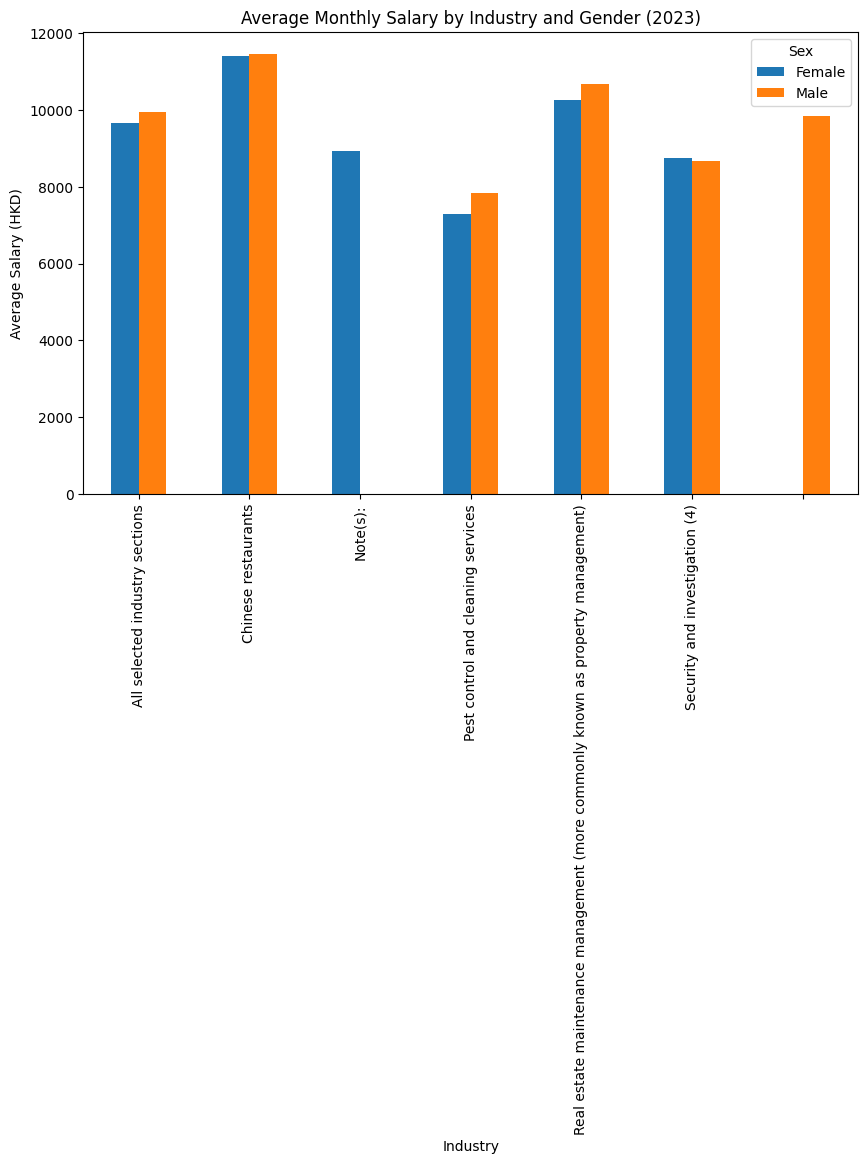

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average salary by industry and gender
grouped_data = data_2023_filtered_cleaned.groupby(['Industry', 'Sex'])['Average_Salary'].mean().unstack()

# Plot the average salary of different genders
grouped_data.plot(kind='bar', figsize=(10, 6))

# Add chart title and labels
plt.title('Average Monthly Salary by Industry and Gender (2023)')
plt.xlabel('Industry')
plt.ylabel('Average Salary (HKD)')
plt.xticks(rotation=90)

# Display the chart
plt.tight_layout()
plt.show()

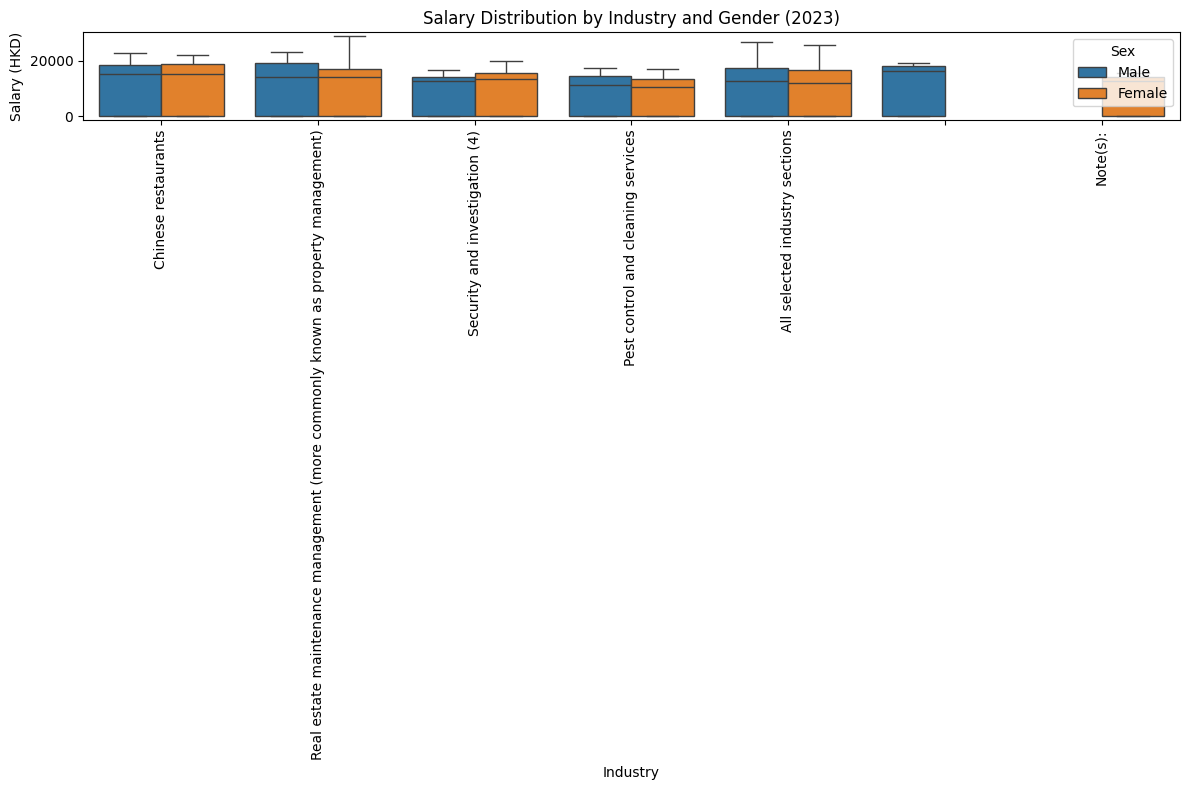

In [ ]:
import seaborn as sns
# Use seaborn to draw box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_2023_long_cleaned, x='Industry', y='Salary', hue='Sex')

plt.title('Salary Distribution by Industry and Gender (2023)')
plt.xlabel('Industry')
plt.ylabel('Salary (HKD)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

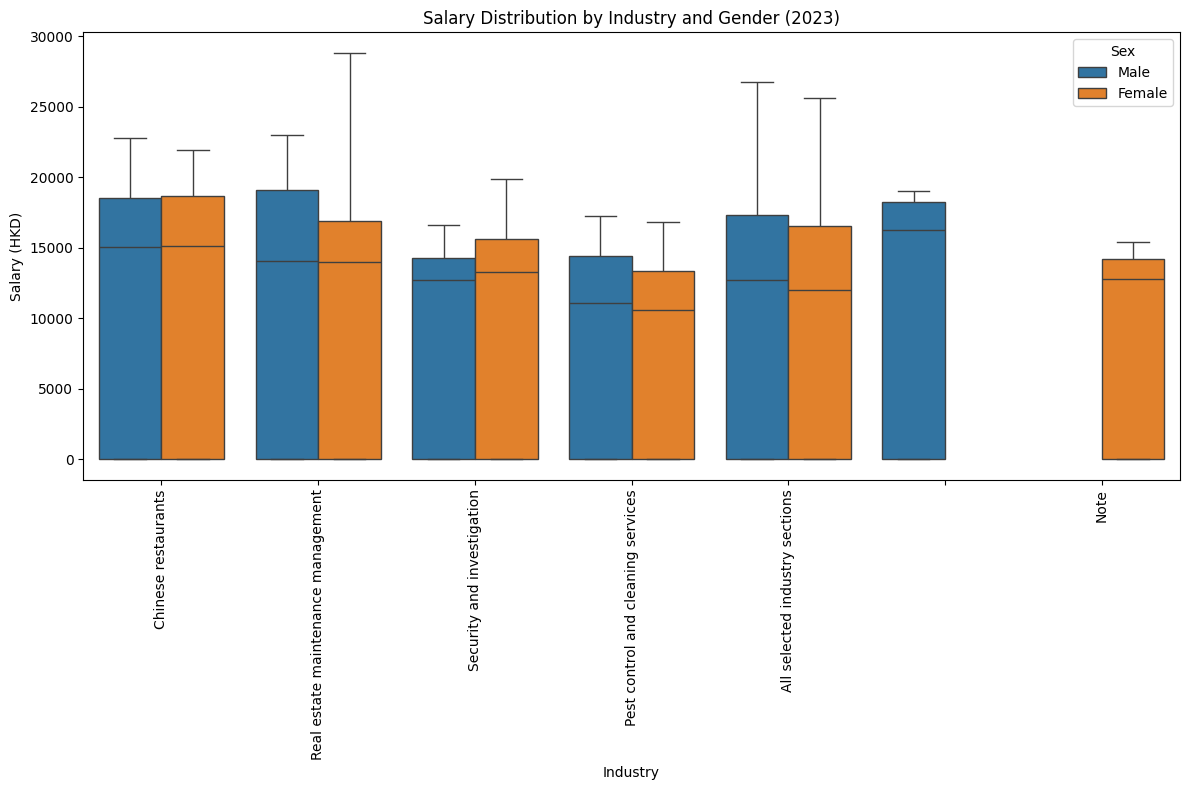

In [ ]:
# Remove the comments in the industry name
data_2023_long_cleaned['Industry'] = data_2023_long_cleaned['Industry'].str.split('(').str[0].str.strip()
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_2023_long_cleaned, x='Industry', y='Salary', hue='Sex')

plt.title('Salary Distribution by Industry and Gender (2023)')
plt.xlabel('Industry')
plt.ylabel('Salary (HKD)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

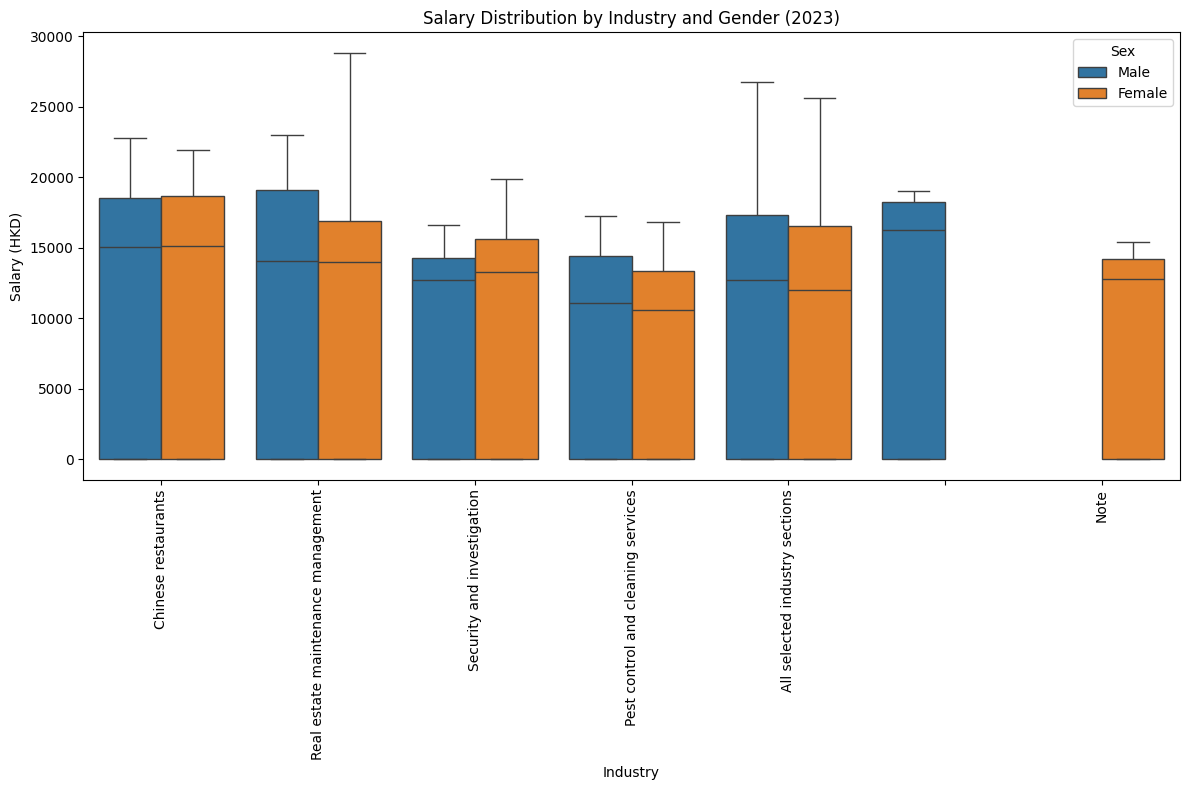

In [ ]:
# Redraw the box plot and set the scale interval of the y-axis
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=data_2023_long_cleaned, x='Industry', y='Salary', hue='Sex')
ax.yaxis.set_major_locator(plt.FixedLocator(range(0, int(data_2023_long_cleaned['Salary'].max()) + 10000, 5000)))
plt.title('Salary Distribution by Industry and Gender (2023)')
plt.xlabel('Industry')
plt.ylabel('Salary (HKD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###Findings:
In the service industry, such as restaurant waiters and property management offices, the income difference between men and women is not obvious, but there are still special positions with large gaps, and men's income far exceeds that of women.The salaries for males and females appear closer, but males still tend to earn slightly more on average.

In lower-paying jobs, the overall salary range is narrower, which can make differences between male and female salaries less noticeable. When salaries are close together, the gap appears smaller. Lower-paying jobs often require less formal education or specialized training, which can lead to a more uniform salary distribution among workers, regardless of gender.

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

# Read CSV file
file_path = '/content/Table 220-19013_en_1.csv'
data = pd.read_csv(file_path, header=None)
data.head()

0      1       2   \
0                                                NaN   2016    2016   
1                                                NaN    Jun     Jun   
2                                                NaN   Male  Female   
3  Supervisory, technical, clerical, service and ...  15838   14332   
4                  Supervisory and technical workers  22662   20221   

           3      4       5           6      7       8           9      10  \
0        2016   2016    2016        2016   2016    2016        2016   2017   
1         Jun    Sep     Sep         Sep    Dec     Dec         Dec    Mar   
2  Both sexes   Male  Female  Both sexes   Male  Female  Both sexes   Male   
3       15026  16482   14373       15338  16362   14481       15357  16213   
4       21433  22793   20676       21788  22912   20733       21888  22731   

       11          12     13      14          15     16      17          18  \
0    2017        2017   2017    2017        2017   2017    2017        2017   
1     Mar         Mar    Jun     Jun         Jun    Sep     Sep         Sep   
2  Female  Both sexes   Male  Female  Both sexes   Male  Female  Both sexes   
3   14448       15262  16553   14724       15600  16733   14984       15790   
4   20725       21748  23151   20653       21982  22872   21048       21973   

      19      20          21     22      23          24     25      26  \
0   2017    2017        2017   2018    2018        2018   2018    2018   
1    Dec     Dec         Dec    Mar     Mar         Mar    Jun     Jun   
2   Male  Female  Both sexes   Male  Female  Both sexes   Male  Female   
3  16707   14811       15714  16667   14954       15748  17478   15338   
4  23259   20862       22112  22788   21473       22150  23522   21593   

           27     28      29          30     31      32          33     34  \
0        2018   2018    2018        2018   2018    2018        2018   2019   
1         Jun    Sep     Sep         Sep    Dec     Dec         Dec    Mar   
2  Both sexes   Male  Female  Both sexes   Male  Female  Both sexes   Male   
3       16351  17799   15519       16616  17828   15540       16631  17964   
4       22633  24186   21944       23166  24051   21766       23009  24505   

       35          36     37      38          39     40      41          42  \
0    2019        2019   2019    2019        2019   2019    2019        2019   
1     Mar         Mar    Jun     Jun         Jun    Sep     Sep         Sep   
2  Female  Both sexes   Male  Female  Both sexes   Male  Female  Both sexes   
3   15656       16755  18226   15931       17026  18269   16006       17089   
4   21920       23297  24531   22506       23628  24685   22123       23497   

      43      44          45     46      47          48     49      50  \
0   2019    2019        2019   2020    2020        2020   2020    2020   
1    Dec     Dec         Dec    Mar     Mar         Mar    Jun     Jun   
2   Male  Female  Both sexes   Male  Female  Both sexes   Male  Female   
3  17914   15795       16777  18023   15612       16733  17936   15777   
4  24056   22031       23097  24130   22372       23327  24806   22365   

           51     52      53          54     55      56          57     58  \
0        2020   2020    2020        2020   2020    2020        2020   2021   
1         Jun    Sep     Sep         Sep    Dec     Dec         Dec    Mar   
2  Both sexes   Male  Female  Both sexes   Male  Female  Both sexes   Male   
3       16743  18139   15846       16912  17951   15567       16631  17910   
4       23585  25095   22265       23752  24851   22443       23687  24521   

       59          60     61      62          63     64      65          66  \
0    2021        2021   2021    2021        2021   2021    2021        2021   
1     Mar         Mar    Jun     Jun         Jun    Sep     Sep         Sep   
2  Female  Both sexes   Male  Female  Both sexes   Male  Female  Both sexes   
3   15485       16612  18165   15606       16787  18233   15

In [ ]:
# Delete the first two lines of irrelevant data
data_cleaned = data.drop([0, 1])
data_cleaned.columns = data_cleaned.iloc[0]
data_cleaned = data_cleaned.drop(2).reset_index(drop=True)
data_cleaned = data_cleaned.rename(columns={data_cleaned.columns[0]: 'Occupation'})

# # Delete the "Both sexes"
columns_to_drop = [col for col in data_cleaned.columns if "Both sexes" in str(col)]
data_cleaned = data_cleaned.drop(columns=columns_to_drop)
data_cleaned.head()

2                                         Occupation   Male Female   Male  \
0  Supervisory, technical, clerical, service and ...  15838  14332  16482   
1                  Supervisory and technical workers  22662  20221  22793   
2                   Office/administrative supervisor  22663  22663  23534   
3                              Accounting supervisor  25907  24517  25002   
4            Estate officer/building services off...  18109  17060  18346   

2 Female   Male Female   Male Female   Male Female   Male Female   Male  \
0  14373  16362  14481  16213  14448  16553  14724  16733  14984  16707   
1  20676  22912  20733  22731  20725  23151  20653  22872  21048  23259   
2  23534  23616  23616  23263  23263  23494  23494  23673  23673  24105   
3  24804  25249  24999  25064  25352  25397  25124  25608  25471  25224   
4  17499  18431  17341  18722  17756  18990  17958  19195  18100  19474   

2 Female   Male Female   Male Female   Male Female   Male Female   Male  \
0  14811  16667  14954  17478  15338  17799  15519  17828  15540  17964   
1  20862  22788  21473  23522  21593  24186  21944  24051  21766  24505   
2  24105  23381  23381  23385  23385  23559  23559  23678  23678  23651   
3  25039  25273  24999  25435  25167  25581  25125  25053  25220  25128   
4  18444  19829  18899  20229  19005  20361  19109  20432  19356  20289   

2 Female   Male Female   Male Female   Male Female   Male Female   Male  \
0  15656  18226  15931  18269  16006  17914  15795  18023  15612  17936   
1  21920  24531  22506  24685  22123  24056  22031  24130  22372  24806   
2  23651  23917  23917  23863  23863  23249  23249  23143  23143  23705   
3  25214  25404  25555  25380  25967  25357  25969  25499  25952  25941   
4  19310  20468  19580  20609  19627  20627  19702  20820  19835  20753   

2 Female   Male Female   Male Female   Male Female   Male Female   Male  \
0  15777  18139  15846  17951  15567  17910  15485  18165  15606  18233   
1  22365  25095  22265  24851  22443  24521  22290  25019  22427  24777   
2  23705  23720  23720  23962  23962  24453  24453  24373  24373  24373   
3  26589  26160  26845  25829  26341  26366  26160  26303  25804  25883   
4  20019  20901  20161  20986  20211  21131  20404  21366  20735  21382   

2 Female   Male Female   Male Female   Male Female   Male Female   Male  \
0  15848  18207  15919  18178  15867  18383  16042  18392  16214  18672   
1  22281  25091  22601  24938  22255  25287  22529  25287  22708  25075   
2  24373  24373  24373  25127  25127  25127  25127  25127  25127  25127   
3  24877  25608  24841  25432  25045  25575  25190  25835  25245  25855   
4  20828  21404  20892  21563  21065  21633  21133  21459  21349  21881   

2 Female   Male Female   Male Female   Male Female   Male Female  
0  16312  18528  16563  18987  16726  19333  16944  19227  17208  
1  22985  25116  23461  25410  23817  25907  23635  25729  24080  
2  25127  25127  25127  24412  24412  24412  24412  25462  25462  
3  25724  26068  25746  26087  26029  26686  26172  27010  26252  
4  21165  22294  21421  22865  21901  22396  21307  21825  21098

In [ ]:
data_melted = pd.melt(data_cleaned, id_vars=['Occupation'], var_name='Year_Gender', value_name='Salary')

data_melted['Year'] = data_melted['Year_Gender'].apply(lambda x: str(x).split()[0])
data_melted['Gender'] = data_melted['Year_Gender'].apply(lambda x: str(x).split()[1] if len(str(x).split()) > 1 else None)
data_melted = data_melted.drop(columns=['Year_Gender'])


data_melted['Year'] = pd.to_numeric(data_melted['Year'], errors='coerce')
data_melted['Salary'] = pd.to_numeric(data_melted['Salary'], errors='coerce')

# Calculate the average male and female wages for each occupation per year
average_salary = data_melted.groupby(['Occupation', 'Year', 'Gender'])['Salary'].mean().reset_index()

average_salary.head()

Empty DataFrame
Columns: [Occupation, Year, Gender, Salary]
Index: []

In [ ]:
# Examine the columns
data_cleaned.columns

Index(['Occupation', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
      dtype='object', name=2)

In [ ]:
data = pd.read_csv(file_path, header=None)

# Extract the first row as the year, the second row as the quarter, and the third row as the gender
years = data.iloc[0, 1:].tolist()
quarters = data.iloc[1, 1:].tolist()
genders = data.iloc[2, 1:].tolist()

new_columns = ['Occupation']
for year, quarter, gender in zip(years, quarters, genders):
    new_columns.append(f"{year}_{quarter}_{gender}")

# Set new column names and delete the first few rows of irrelevant data
data.columns = new_columns
data = data.drop([0, 1, 2]).reset_index(drop=True)
data_long = pd.melt(data, id_vars=['Occupation'], var_name='Year_Quarter_Gender', value_name='Salary')
data_long[['Year', 'Quarter', 'Gender']] = data_long['Year_Quarter_Gender'].str.split('_', expand=True)
data_long = data_long.drop(columns=['Year_Quarter_Gender', 'Quarter'])

# Convert data types
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Salary'] = pd.to_numeric(data_long['Salary'], errors='coerce')

# Calculate the average male and female wages for each occupation per year
average_salary = data_long.groupby(['Occupation', 'Year', 'Gender'])['Salary'].mean().reset_index()

# print
average_salary.head()

Occupation  Year      Gender        Salary
0            Accounting supervisor  2016  Both sexes  24885.000000
1            Accounting supervisor  2016      Female  24773.333333
2            Accounting supervisor  2016        Male  25386.000000
3            Accounting supervisor  2017  Both sexes  25263.250000
4            Accounting supervisor  2017      Female  25246.500000

In [ ]:
# Remove the data for "Both sexes"
average_salary_filtered = average_salary[average_salary['Gender'] != 'Both sexes']
average_salary_filtered.head()

Occupation  Year  Gender        Salary
1            Accounting supervisor  2016  Female  24773.333333
2            Accounting supervisor  2016    Male  25386.000000
4            Accounting supervisor  2017  Female  25246.500000
5            Accounting supervisor  2017    Male  25323.250000
7            Accounting supervisor  2018  Female  25127.750000

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create an empty river map data structure
fig = make_subplots()
occupations = average_salary_filtered['Occupation'].unique()

# Generate river maps for each profession
for occupation in occupations:
    filtered_data = average_salary_filtered[average_salary_filtered['Occupation'] == occupation]

    # Get data for males and females separately
    male_data = filtered_data[filtered_data['Gender'] == 'Male']
    female_data = filtered_data[filtered_data['Gender'] == 'Female']

    # Add male and female lines to the river plot
    fig.add_trace(go.Scatter(x=male_data['Year'], y=male_data['Salary'], mode='lines', name=f'{occupation} Male'))
    fig.add_trace(go.Scatter(x=female_data['Year'], y=female_data['Salary'], mode='lines', name=f'{occupation} Female'))


fig.update_layout(title='Male and Female Salary Trends by Occupation Over Years',
                  xaxis_title='Year',
                  yaxis_title='Average Salary')

# Display the chart
fig.show()

###Findings:
The chart displays average salary trends for various occupations, indicating how male and female salaries have evolved from 2016 to 2022.

Across the various years represented, male salaries tend to be higher than female salaries for the same occupation.
This is particularly evident in roles like "Accounting clerk." Women are underrepresented in leadership and executive positions, which are generally higher-paying. This disparity contributes to the overall wage gap. For occupations with specific skills, for example, Cook. Male cooks generally have higher salaries compared to female cooks, though the gap is less pronounced than in higher managerial roles.

In many occupations, female salaries show slower growth compared to their male counterparts, contributing to persistent wage disparities.

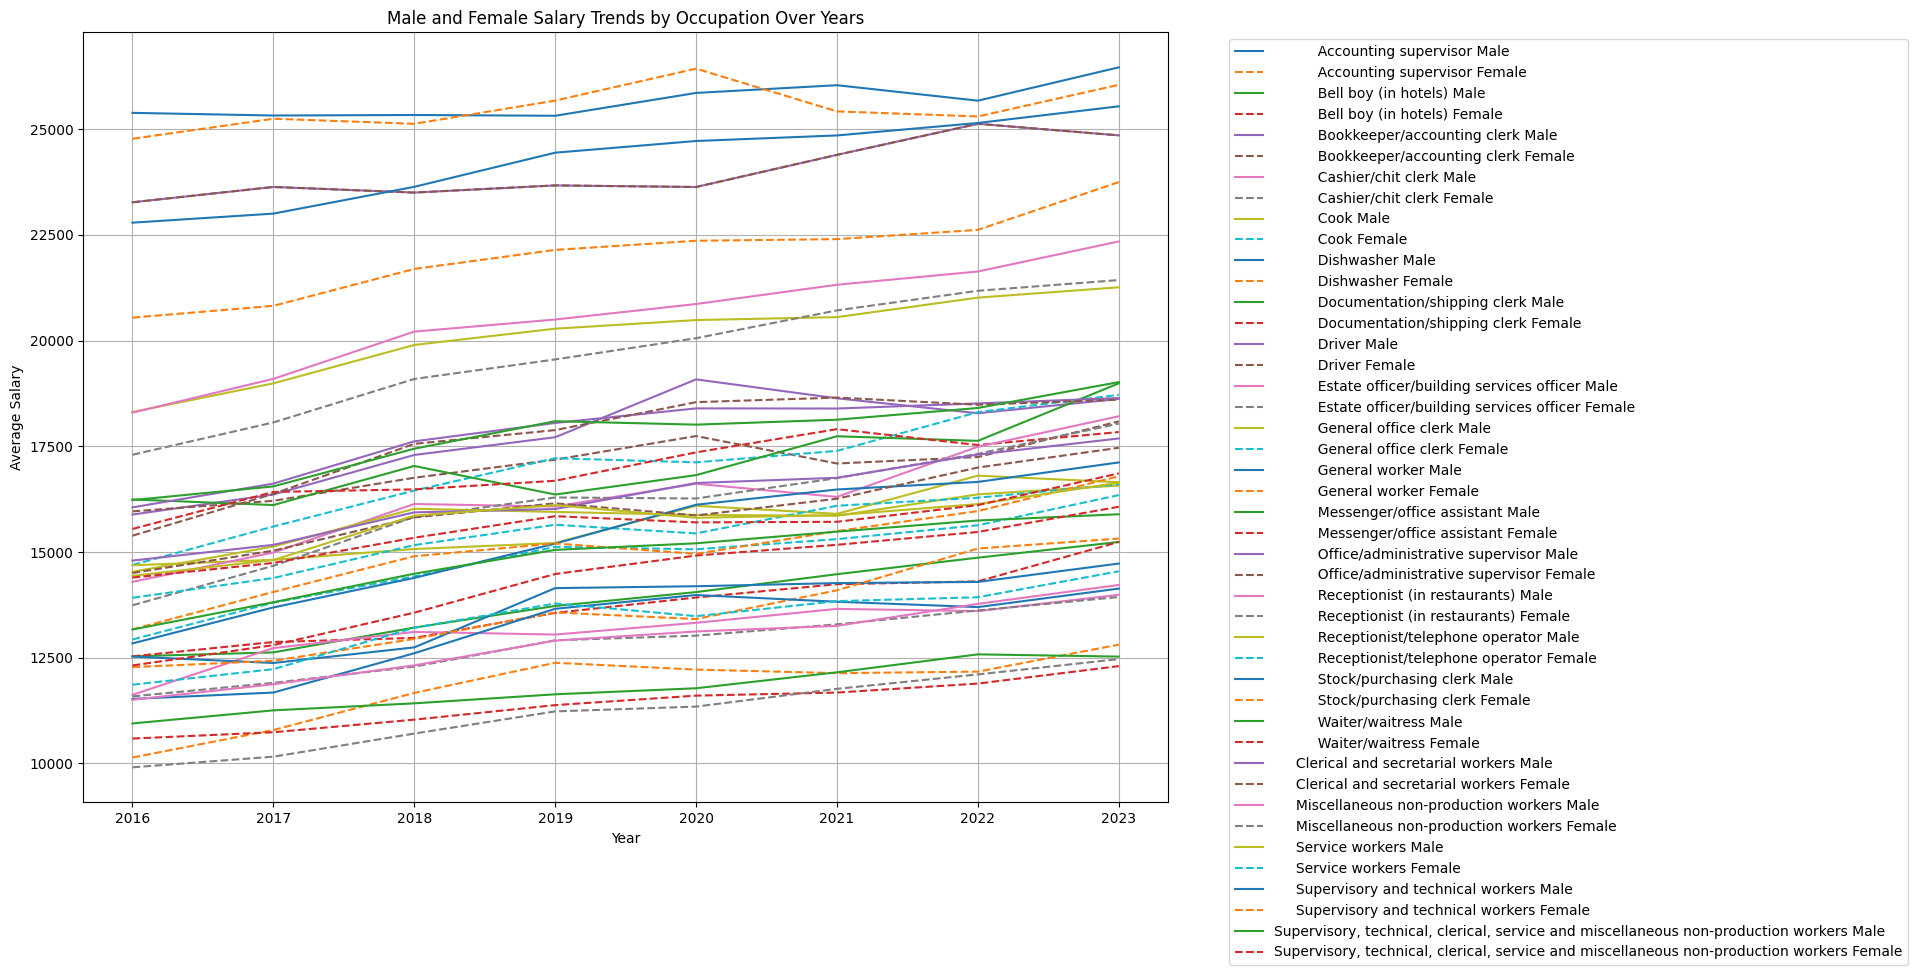

In [ ]:
import matplotlib.pyplot as plt

# Get a list of all occupations
occupations = average_salary_filtered['Occupation'].unique()

# Generate river maps for each profession
plt.figure(figsize=(14, 10))

for occupation in occupations:
    filtered_data = average_salary_filtered[average_salary_filtered['Occupation'] == occupation]

    # Get data for males and females separately
    male_data = filtered_data[filtered_data['Gender'] == 'Male']
    female_data = filtered_data[filtered_data['Gender'] == 'Female']
    plt.plot(male_data['Year'], male_data['Salary'], label=f'{occupation} Male', linestyle='-')
    plt.plot(female_data['Year'], female_data['Salary'], label=f'{occupation} Female', linestyle='--')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Male and Female Salary Trends by Occupation Over Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)

plt.show()

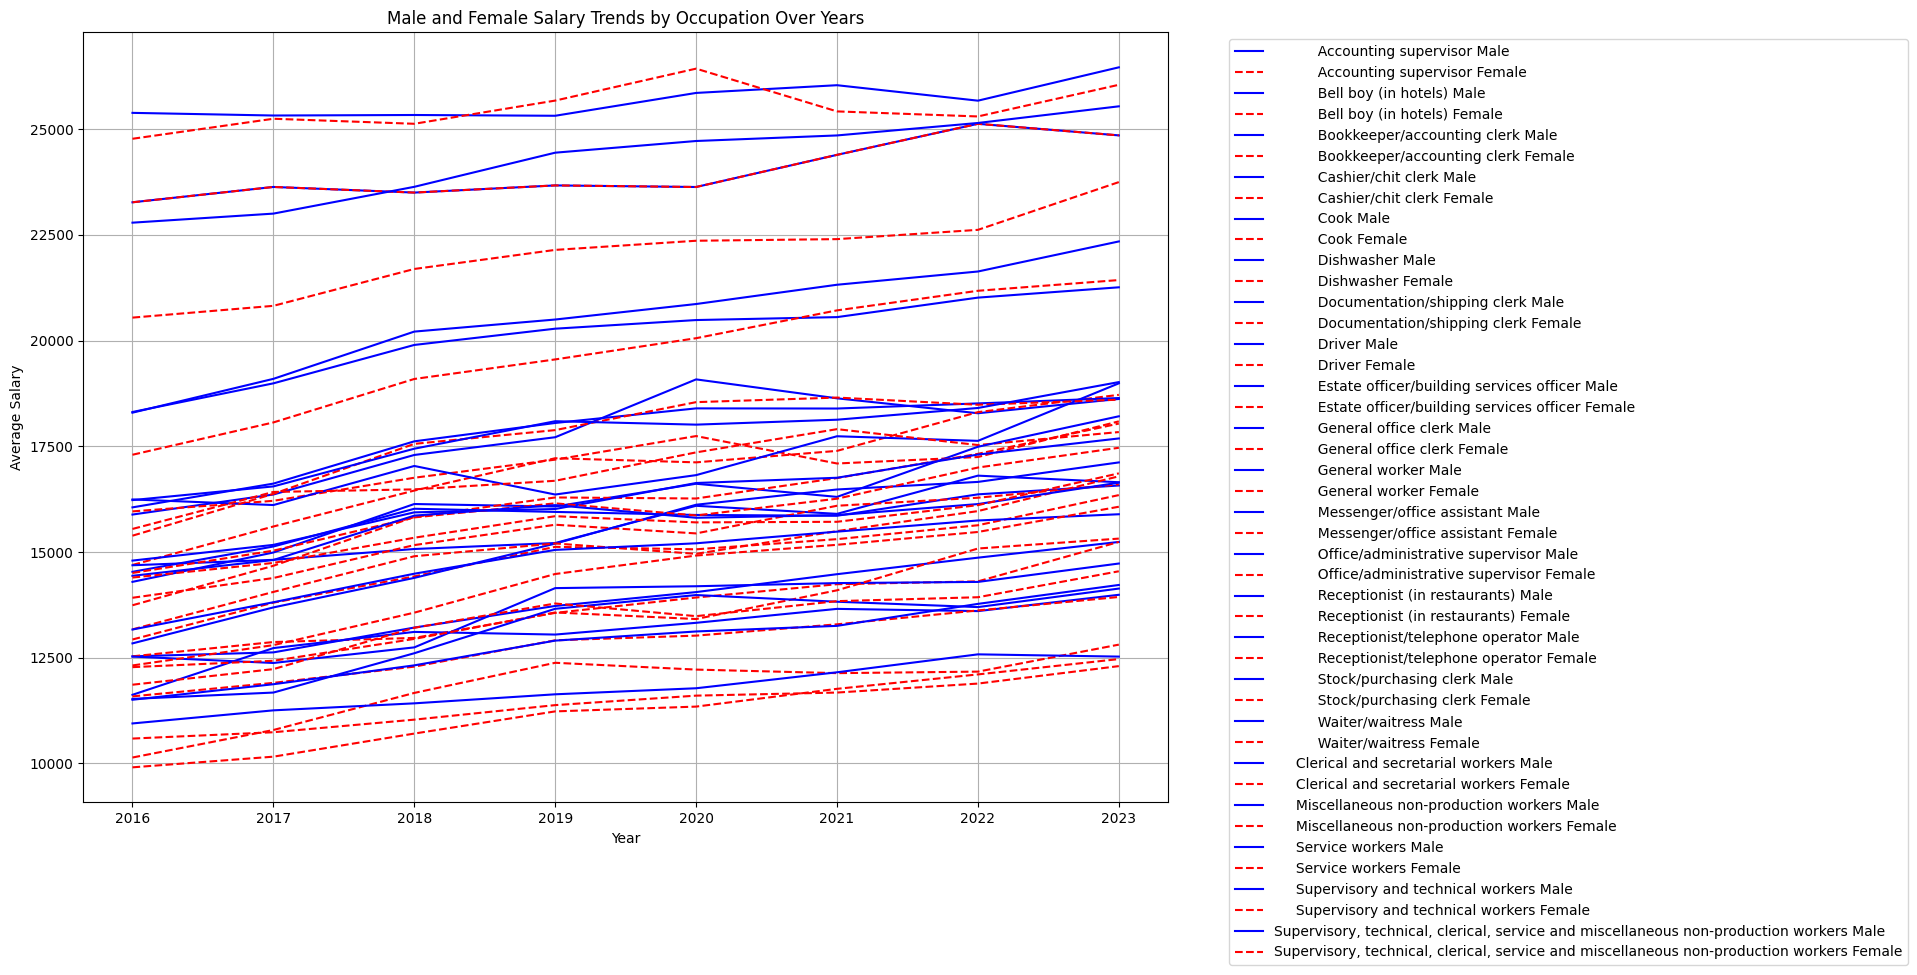

In [ ]:
# Redraw the chart and use different colors to distinguish male and female data
plt.figure(figsize=(14, 10))

# Define the colors of male and female
male_color = 'blue'
female_color = 'red'

for occupation in occupations:
    filtered_data = average_salary_filtered[average_salary_filtered['Occupation'] == occupation]
    male_data = filtered_data[filtered_data['Gender'] == 'Male']
    female_data = filtered_data[filtered_data['Gender'] == 'Female']

    # Plot salary trend lines for men and women, using specified colors
    plt.plot(male_data['Year'], male_data['Salary'], label=f'{occupation} Male', color=male_color, linestyle='-')
    plt.plot(female_data['Year'], female_data['Salary'], label=f'{occupation} Female', color=female_color, linestyle='--')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Male and Female Salary Trends by Occupation Over Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

###Findings:
Some occupations show narrowing gaps over time, suggesting improvements in pay equity, but significant differences remain in higher-paying roles.Wage levels are gradually increasing over time. The salaries for males and females appear closer,  but males still tend to earn slightly more on average.

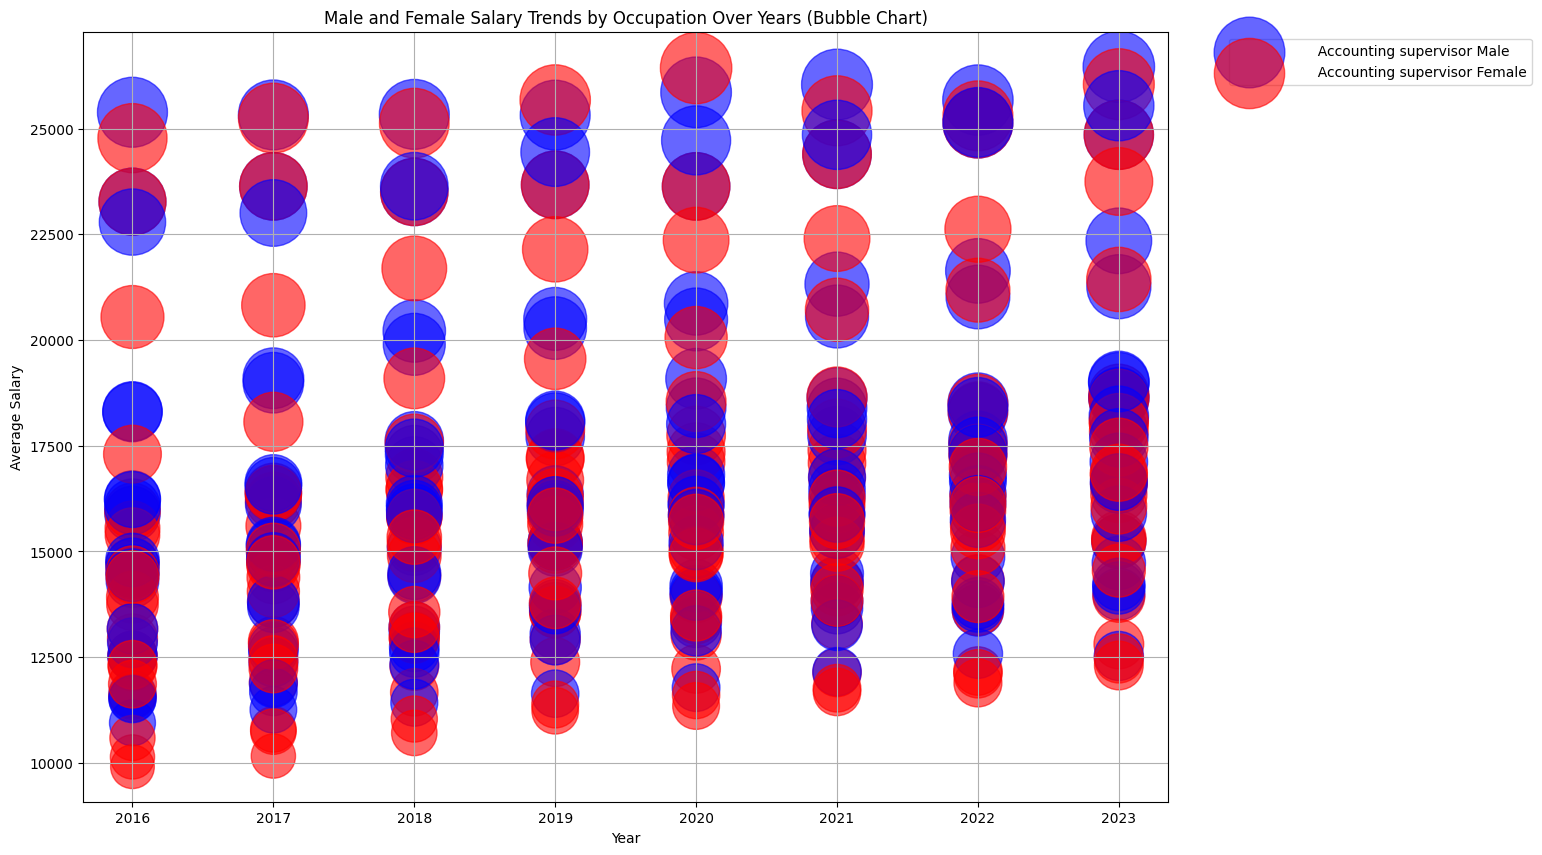

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

average_salary_filtered = average_salary[average_salary['Gender'] != 'Both sexes']
occupations = average_salary_filtered['Occupation'].unique()

# Create a bubble chart
plt.figure(figsize=(14, 10))

# color
colors = {'Male': 'blue', 'Female': 'red'}

for occupation in occupations:
    for gender in ['Male', 'Female']:
        filtered_data = average_salary_filtered[(average_salary_filtered['Occupation'] == occupation) &
                                                   (average_salary_filtered['Gender'] == gender)]

        # Draw a bubble chart, the bubble size is the absolute value of the salary
        plt.scatter(filtered_data['Year'],
                     filtered_data['Salary'],
                     s=filtered_data['Salary']/10,  # 气泡大小
                     alpha=0.6,
                     color=colors[gender],
                     label=f'{occupation} {gender}' if occupation == occupations[0] else "")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Male and Female Salary Trends by Occupation Over Years (Bubble Chart)')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)

plt.show()

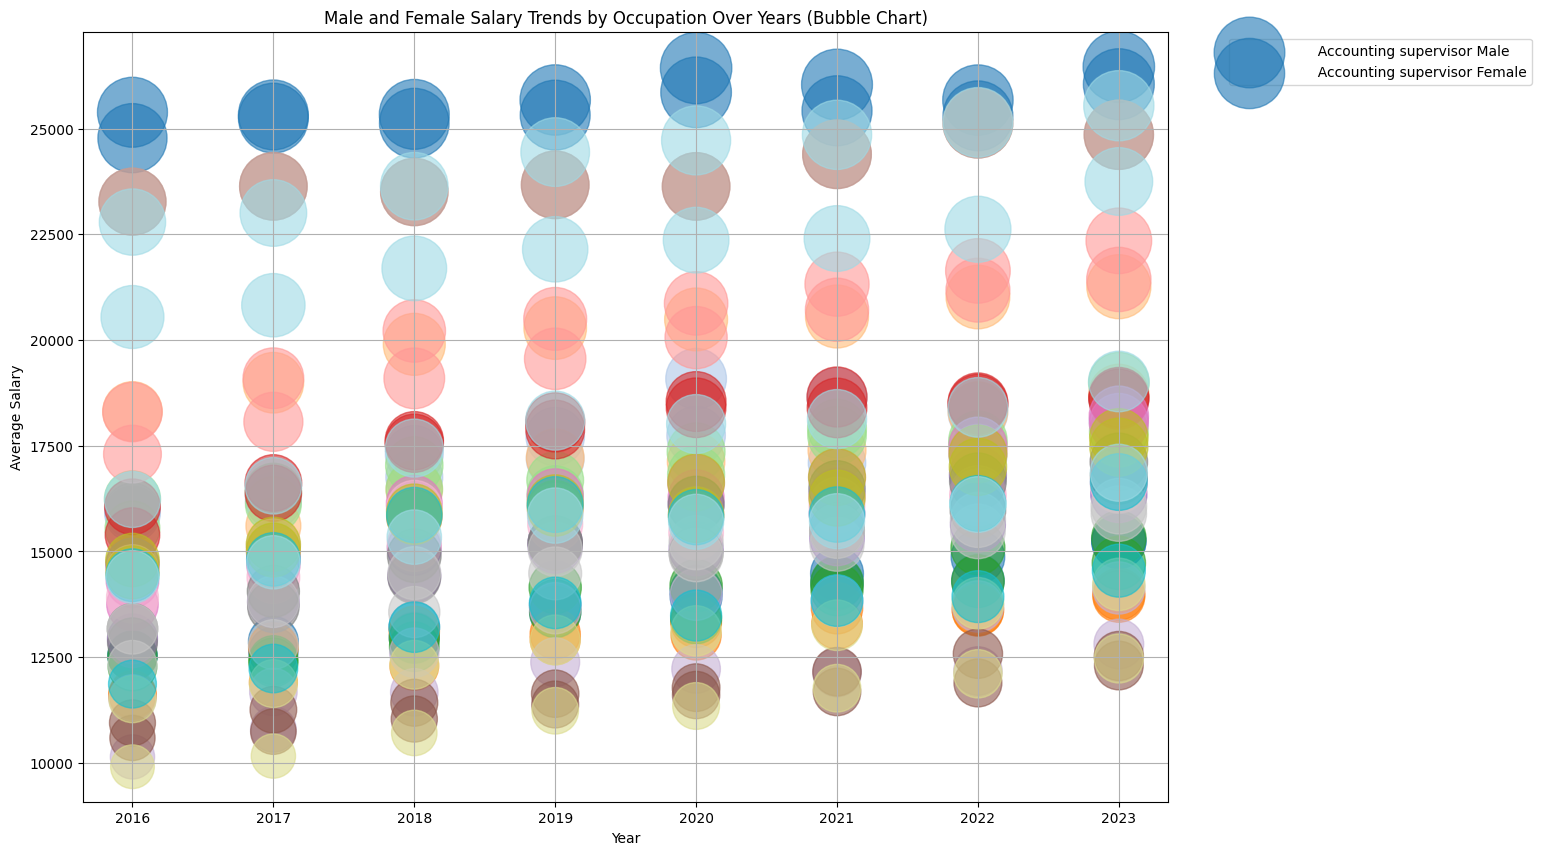

In [ ]:
# Assign a unique color to each profession
unique_colors = plt.cm.tab20(np.linspace(0, 1, len(occupations)))
color_map = {occupation: unique_colors[i] for i, occupation in enumerate(occupations)}

# Create a bubble chart
plt.figure(figsize=(14, 10))

for occupation in occupations:
    for gender in ['Male', 'Female']:
        filtered_data = average_salary_filtered[(average_salary_filtered['Occupation'] == occupation) &
                                                   (average_salary_filtered['Gender'] == gender)]

        # Draw a bubble chart, the bubble size is the absolute value of the salary, and the color is based on the occupation
        plt.scatter(filtered_data['Year'],
                     filtered_data['Salary'],
                     s=filtered_data['Salary']/10,  # 气泡大小
                     alpha=0.6,
                     color=color_map[occupation],
                     label=f'{occupation} {gender}' if occupation == occupations[0] else "")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Male and Female Salary Trends by Occupation Over Years (Bubble Chart)')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

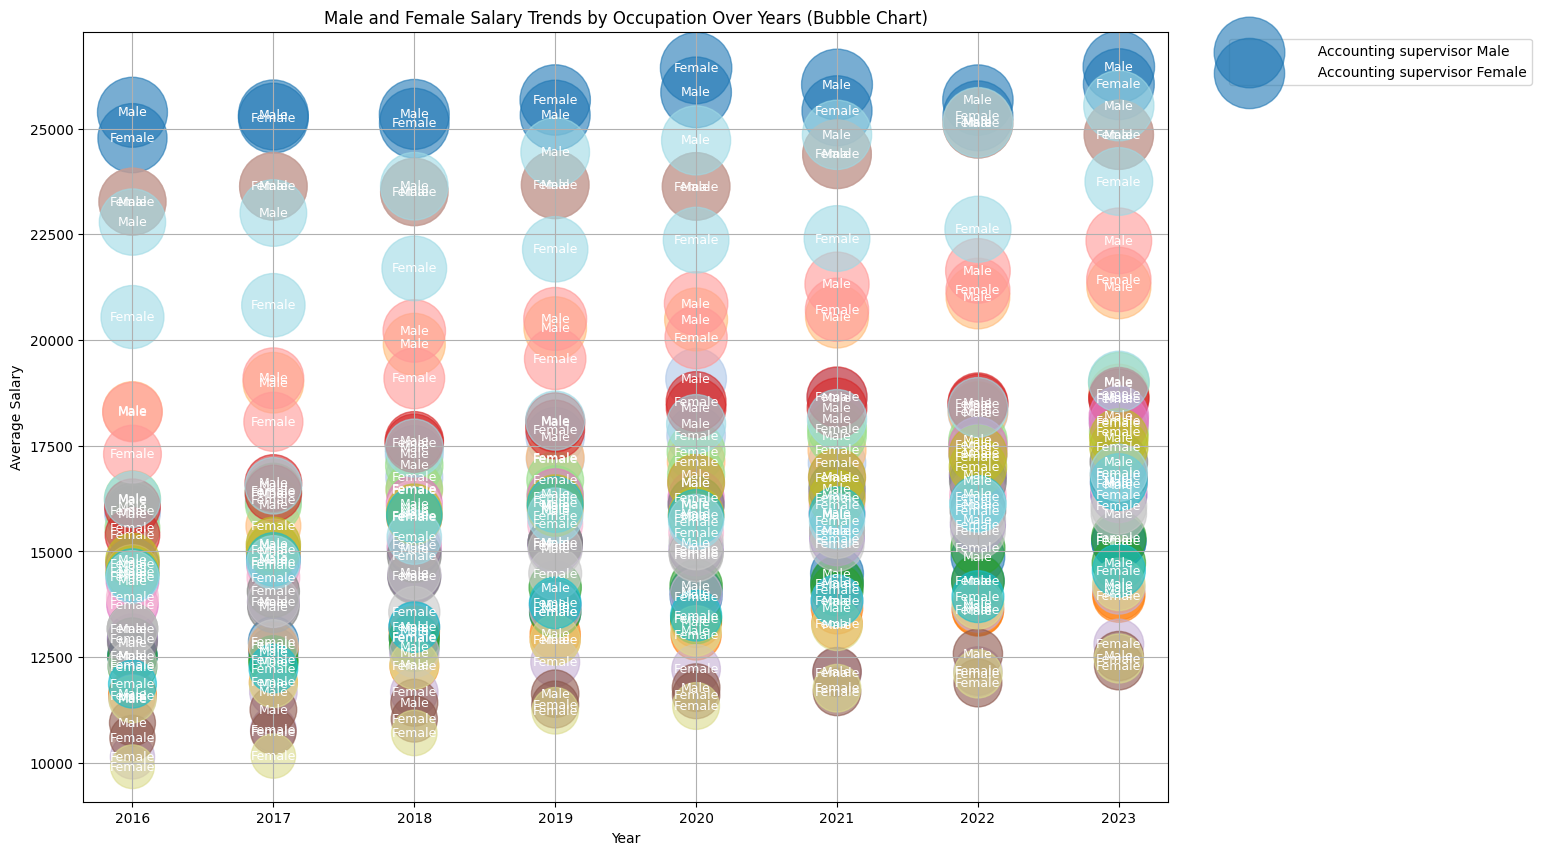

In [ ]:
# Create a bubble chart and label each bubble "Male" and "Female"
plt.figure(figsize=(14, 10))

for occupation in occupations:
    for gender in ['Male', 'Female']:
        filtered_data = average_salary_filtered[(average_salary_filtered['Occupation'] == occupation) &
                                                   (average_salary_filtered['Gender'] == gender)]

        bubbles = plt.scatter(filtered_data['Year'],
                             filtered_data['Salary'],
                             s=filtered_data['Salary']/10,  # 气泡大小
                             alpha=0.6,
                             color=color_map[occupation],
                             label=f'{occupation} {gender}' if occupation == occupations[0] else "")

        # Label each bubble "Male" or "Female"
        for i, row in filtered_data.iterrows():
            plt.text(row['Year'], row['Salary'], gender, fontsize=9, color='white', ha='center', va='center')


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Male and Female Salary Trends by Occupation Over Years (Bubble Chart)')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

###Findings:
In the salary range of 19,000-22,500 in Hong Kong, there is a large gender gap between men and women, and this type of occupation are basicly supervisory and technical workers.

Both male and female salaries show an upward trend over the years. However, males consistently occupy higher salary brackets than females, indicating a persistent gender pay gap.

Certain jobs are traditionally viewed as "male" or "female," leading to a concentration of one gender in specific roles. For example, fields like engineering and technology often have more men. This segregation can result in disparities in pay.

Women are underrepresented in leadership positions, which are often higher-paying. This lack of representation can perpetuate the cycle of lower salaries for women in the workforce.

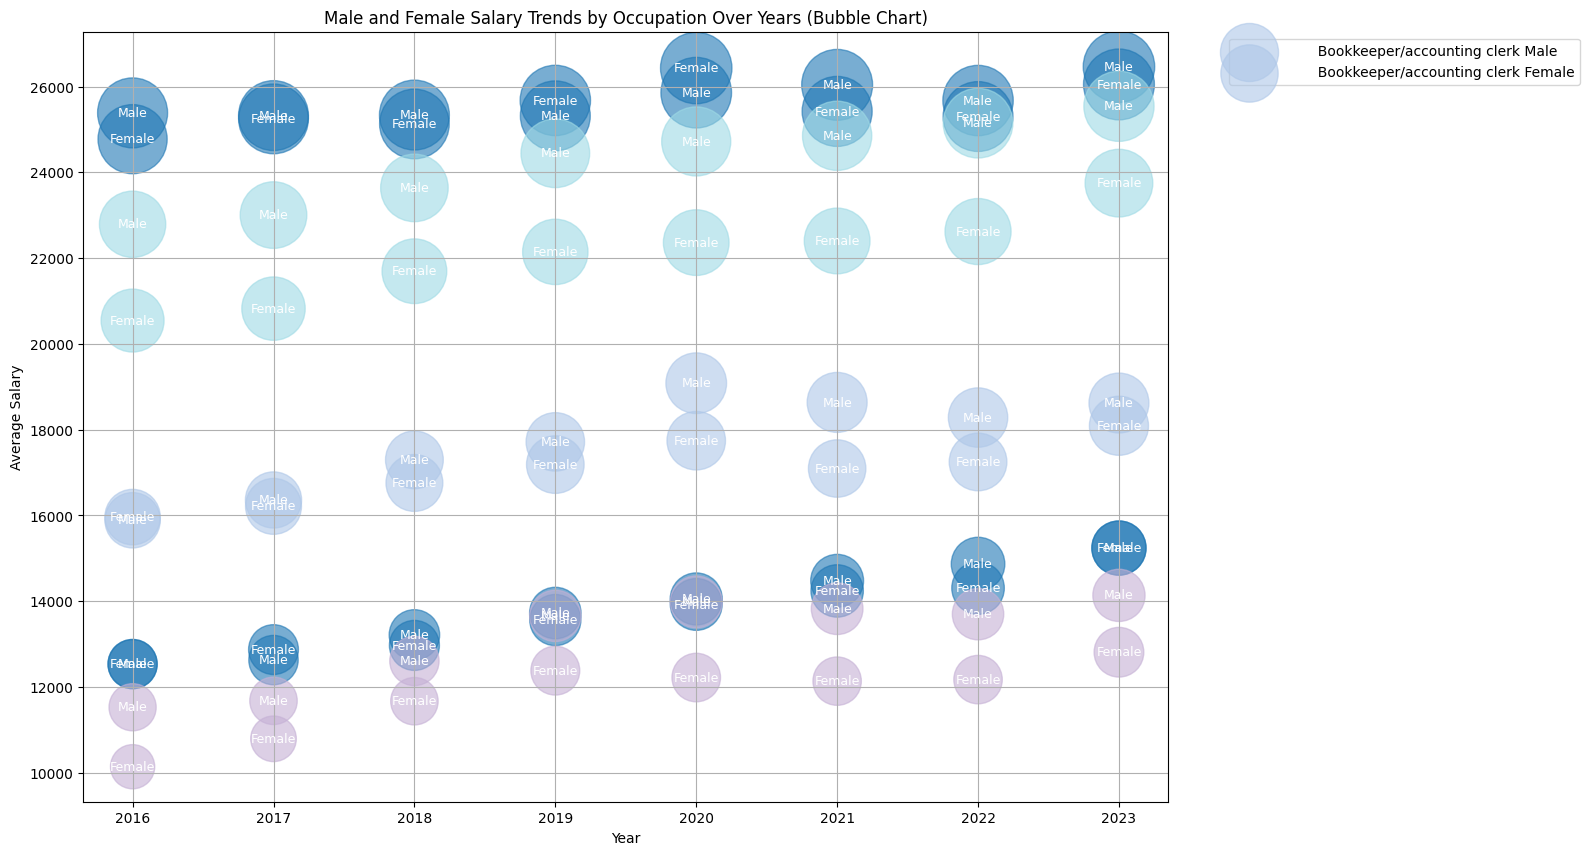

array(['          Bookkeeper/accounting clerk',
       '          Accounting supervisor',
       '          Bell boy (in hotels)',
       '     Supervisory and technical workers',
       '          General worker'], dtype=object)

In [ ]:
# Randomly select 5 professions
selected_occupations = np.random.choice(occupations, 5, replace=False)

# Create a bubble chart and label each bubble "Male" and "Female" for only the randomly selected occupations
plt.figure(figsize=(14, 10))

for occupation in selected_occupations:
    for gender in ['Male', 'Female']:
        filtered_data = average_salary_filtered[(average_salary_filtered['Occupation'] == occupation) &
                                                   (average_salary_filtered['Gender'] == gender)]

        # bubble chart
        bubbles = plt.scatter(filtered_data['Year'],
                             filtered_data['Salary'],
                             s=filtered_data['Salary']/10,  # 气泡大小
                             alpha=0.6,
                             color=color_map[occupation],
                             label=f'{occupation} {gender}' if occupation == selected_occupations[0] else "")

        # "Male"  "Female"
        for i, row in filtered_data.iterrows():
            plt.text(row['Year'], row['Salary'], gender, fontsize=9, color='white', ha='center', va='center')

# Add legend and title
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Male and Female Salary Trends by Occupation Over Years (Bubble Chart)')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)

plt.show()
selected_occupations